# Using Linear Regression vs Random Forest Regression Model With Same Important Feature

# Import Library

In [1746]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge

# Import Dataset

In [1747]:
#data_up5 = pd.read_csv('UP-5.csv')
#data_up6 = pd.read_csv('UP-6.csv')

In [1748]:
data_up5 = pd.read_csv('https://raw.githubusercontent.com/ikiearth/DATASET-UTS-AI-Universitas-Pertamina/main/UP-5.csv')
data_up6 = pd.read_csv('https://raw.githubusercontent.com/ikiearth/DATASET-UTS-AI-Universitas-Pertamina/main/UP-6.csv')

In [1749]:
data_up5.head()

Formation  TMD (m)  TVD (m)  ROP (m/hr)  WOB (ton)  FR (gpm)  SPP (psi)  \
0      Seno      428   428.01        33.3          3     514.3        818   
1      Seno      429   429.01        39.3          4     428.8        554   
2      Seno      430   430.00        26.7          3     442.7        547   
3      Seno      431   430.99        29.1          5     604.9       1259   
4      Seno      432   432.00        40.8         10     782.1       1846   

   RPM (rpm)  TQ (lb.ft)  MW IN (ppg)  MW OUT (ppg)  RETURN (%)  \
0         70        1915         10.4        10.401          44   
1         79        2383         10.4        10.403          40   
2         79        2499         10.4        10.405          40   
3         82        1080         10.4        10.407          48   
4         92        3106         10.4        10.409          58   

   BIT TIME (hr)            DATE TIME  
0           0.01  19/06/2010 07.12.15  
1           0.05  19/06/2010 07.14.23  
2           0.09  19/06/2010 07.16.43  
3           0.20  19/06/2010 09.04.13  
4           0.23  19/06/2010 09.05.52

In [1750]:
data_up6.head()

FORMATION  BIT SIZE (in)  TMD (m)  TVD (m)  ROP (m/hr)  WOB (ton)  FR (gpm)  \
0       Mio           24.0       18    18.02        25.6          2     152.4   
1       Mio           24.0       19    19.00        35.5          2     152.2   
2       Mio           24.0       20    19.50        20.6          2     114.3   
3       Mio           24.0       21    19.50        20.1          2     152.3   
4       Mio           24.0       22    19.50        19.9          2     152.3   

   SPP (psi)  RPM (rpm)  TQ (lb*ft)  MW IN (ppg)  MW OUT (ppg)  RETURN (%)  \
0         10         62        1363          8.7           8.7           0   
1         10         57         649          8.7           8.7           0   
2          8         43           0          8.7           8.7           0   
3         10         58           0          8.7           8.7           0   
4         10         58           0          8.7           8.7           0   

   BIT TIME (hr)            DATE TIME  
0           0.04  28/07/2010 12.17.20  
1           0.11  28/07/2010 12.21.35  
2           0.17  28/07/2010 12.46.54  
3           0.17  28/07/2010 12.25.31  
4           0.17  28/07/2010 12.25.31

In [1751]:
data_up5.isnull().sum()

Formation        0
TMD (m)          0
TVD (m)          0
ROP (m/hr)       0
WOB (ton)        0
FR (gpm)         0
SPP (psi)        0
RPM (rpm)        0
TQ (lb.ft)       0
MW IN (ppg)      0
MW OUT (ppg)     0
RETURN (%)       0
BIT TIME (hr)    0
DATE TIME        0
dtype: int64

In [1752]:
data_up6.isnull().sum()

FORMATION        0
BIT SIZE (in)    0
TMD (m)          0
TVD (m)          0
ROP (m/hr)       0
WOB (ton)        0
FR (gpm)         0
SPP (psi)        0
RPM (rpm)        0
TQ (lb*ft)       0
MW IN (ppg)      0
MW OUT (ppg)     0
RETURN (%)       0
BIT TIME (hr)    0
DATE TIME        0
dtype: int64

In [1753]:
data_up5.columns

Index(['Formation', 'TMD (m)', 'TVD (m)', 'ROP (m/hr)', 'WOB (ton)',
       'FR (gpm)', 'SPP (psi)', 'RPM (rpm)', 'TQ (lb.ft)', 'MW IN (ppg)',
       'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)', 'DATE TIME'],
      dtype='object')

In [1754]:
data_up6.columns

Index(['FORMATION', 'BIT SIZE (in)', 'TMD (m)', 'TVD (m)', 'ROP (m/hr)',
       'WOB (ton)', 'FR (gpm)', 'SPP (psi)', 'RPM (rpm)', 'TQ (lb*ft)',
       'MW IN (ppg)', 'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)',
       'DATE TIME'],
      dtype='object')

# Pada dataset terlampir, terdapat data kegiatan pengeboran pada sumur UP-5 dan UP-6 yang meliputi:

* FORMATION, merupakan nama formasi batuan yang ditembus pada kedalaman tertentu
* BITSIZE,merupakan ukuran bit yang digunakan (inch)
* TMD,merupakan truemeasured depth (meter)
* TVD,merupakan true vertical depth (meter)
* ROP,merupakan rate of penetration atau laju penetrasi (meter/jam)
* WOB,merupakan weight on bit (ton)
* FR,merupakan laju alir lumpur (gallon/menit)
* SPP,merupakan stand-pipe pressure (psi)
* RPM,merupakan angular speed dari rotasi drillstring (rpm)
* TQ,merupakan bacaan torque (pound-foot)
* MWIN,merupakan densitas lumpur yang dipompakan melalui drillstring (pound/gallon)
* MWOUT,merupakan densitas lumpur yang kembali kepermukaan (pound/gallon)
* RETURN,merupakan persentase volume lumpur yang kembali kepermukaan (%)
* BITTIME,merupakan durasi penggunaan bit yang sama (jam)
* DATETIME,merupakan tanggal dan waktu untuk menembus kedalaman tertentu

# Exploratory Data Analysis

In [1755]:
data_up5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Formation      2058 non-null   object 
 1   TMD (m)        2058 non-null   int64  
 2   TVD (m)        2058 non-null   float64
 3   ROP (m/hr)     2058 non-null   float64
 4   WOB (ton)      2058 non-null   int64  
 5   FR (gpm)       2058 non-null   float64
 6   SPP (psi)      2058 non-null   int64  
 7   RPM (rpm)      2058 non-null   int64  
 8   TQ (lb.ft)     2058 non-null   int64  
 9   MW IN (ppg)    2058 non-null   float64
 10  MW OUT (ppg)   2058 non-null   float64
 11  RETURN (%)     2058 non-null   int64  
 12  BIT TIME (hr)  2058 non-null   float64
 13  DATE TIME      2058 non-null   object 
dtypes: float64(6), int64(6), object(2)
memory usage: 225.2+ KB


In [1756]:
data_up6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FORMATION      2513 non-null   object 
 1   BIT SIZE (in)  2513 non-null   float64
 2   TMD (m)        2513 non-null   int64  
 3   TVD (m)        2513 non-null   float64
 4   ROP (m/hr)     2513 non-null   float64
 5   WOB (ton)      2513 non-null   int64  
 6   FR (gpm)       2513 non-null   float64
 7   SPP (psi)      2513 non-null   int64  
 8   RPM (rpm)      2513 non-null   int64  
 9   TQ (lb*ft)     2513 non-null   int64  
 10  MW IN (ppg)    2513 non-null   float64
 11  MW OUT (ppg)   2513 non-null   float64
 12  RETURN (%)     2513 non-null   int64  
 13  BIT TIME (hr)  2513 non-null   float64
 14  DATE TIME      2513 non-null   object 
dtypes: float64(7), int64(6), object(2)
memory usage: 294.6+ KB


# Dataset UP-5

## Multivariate Data Analysis

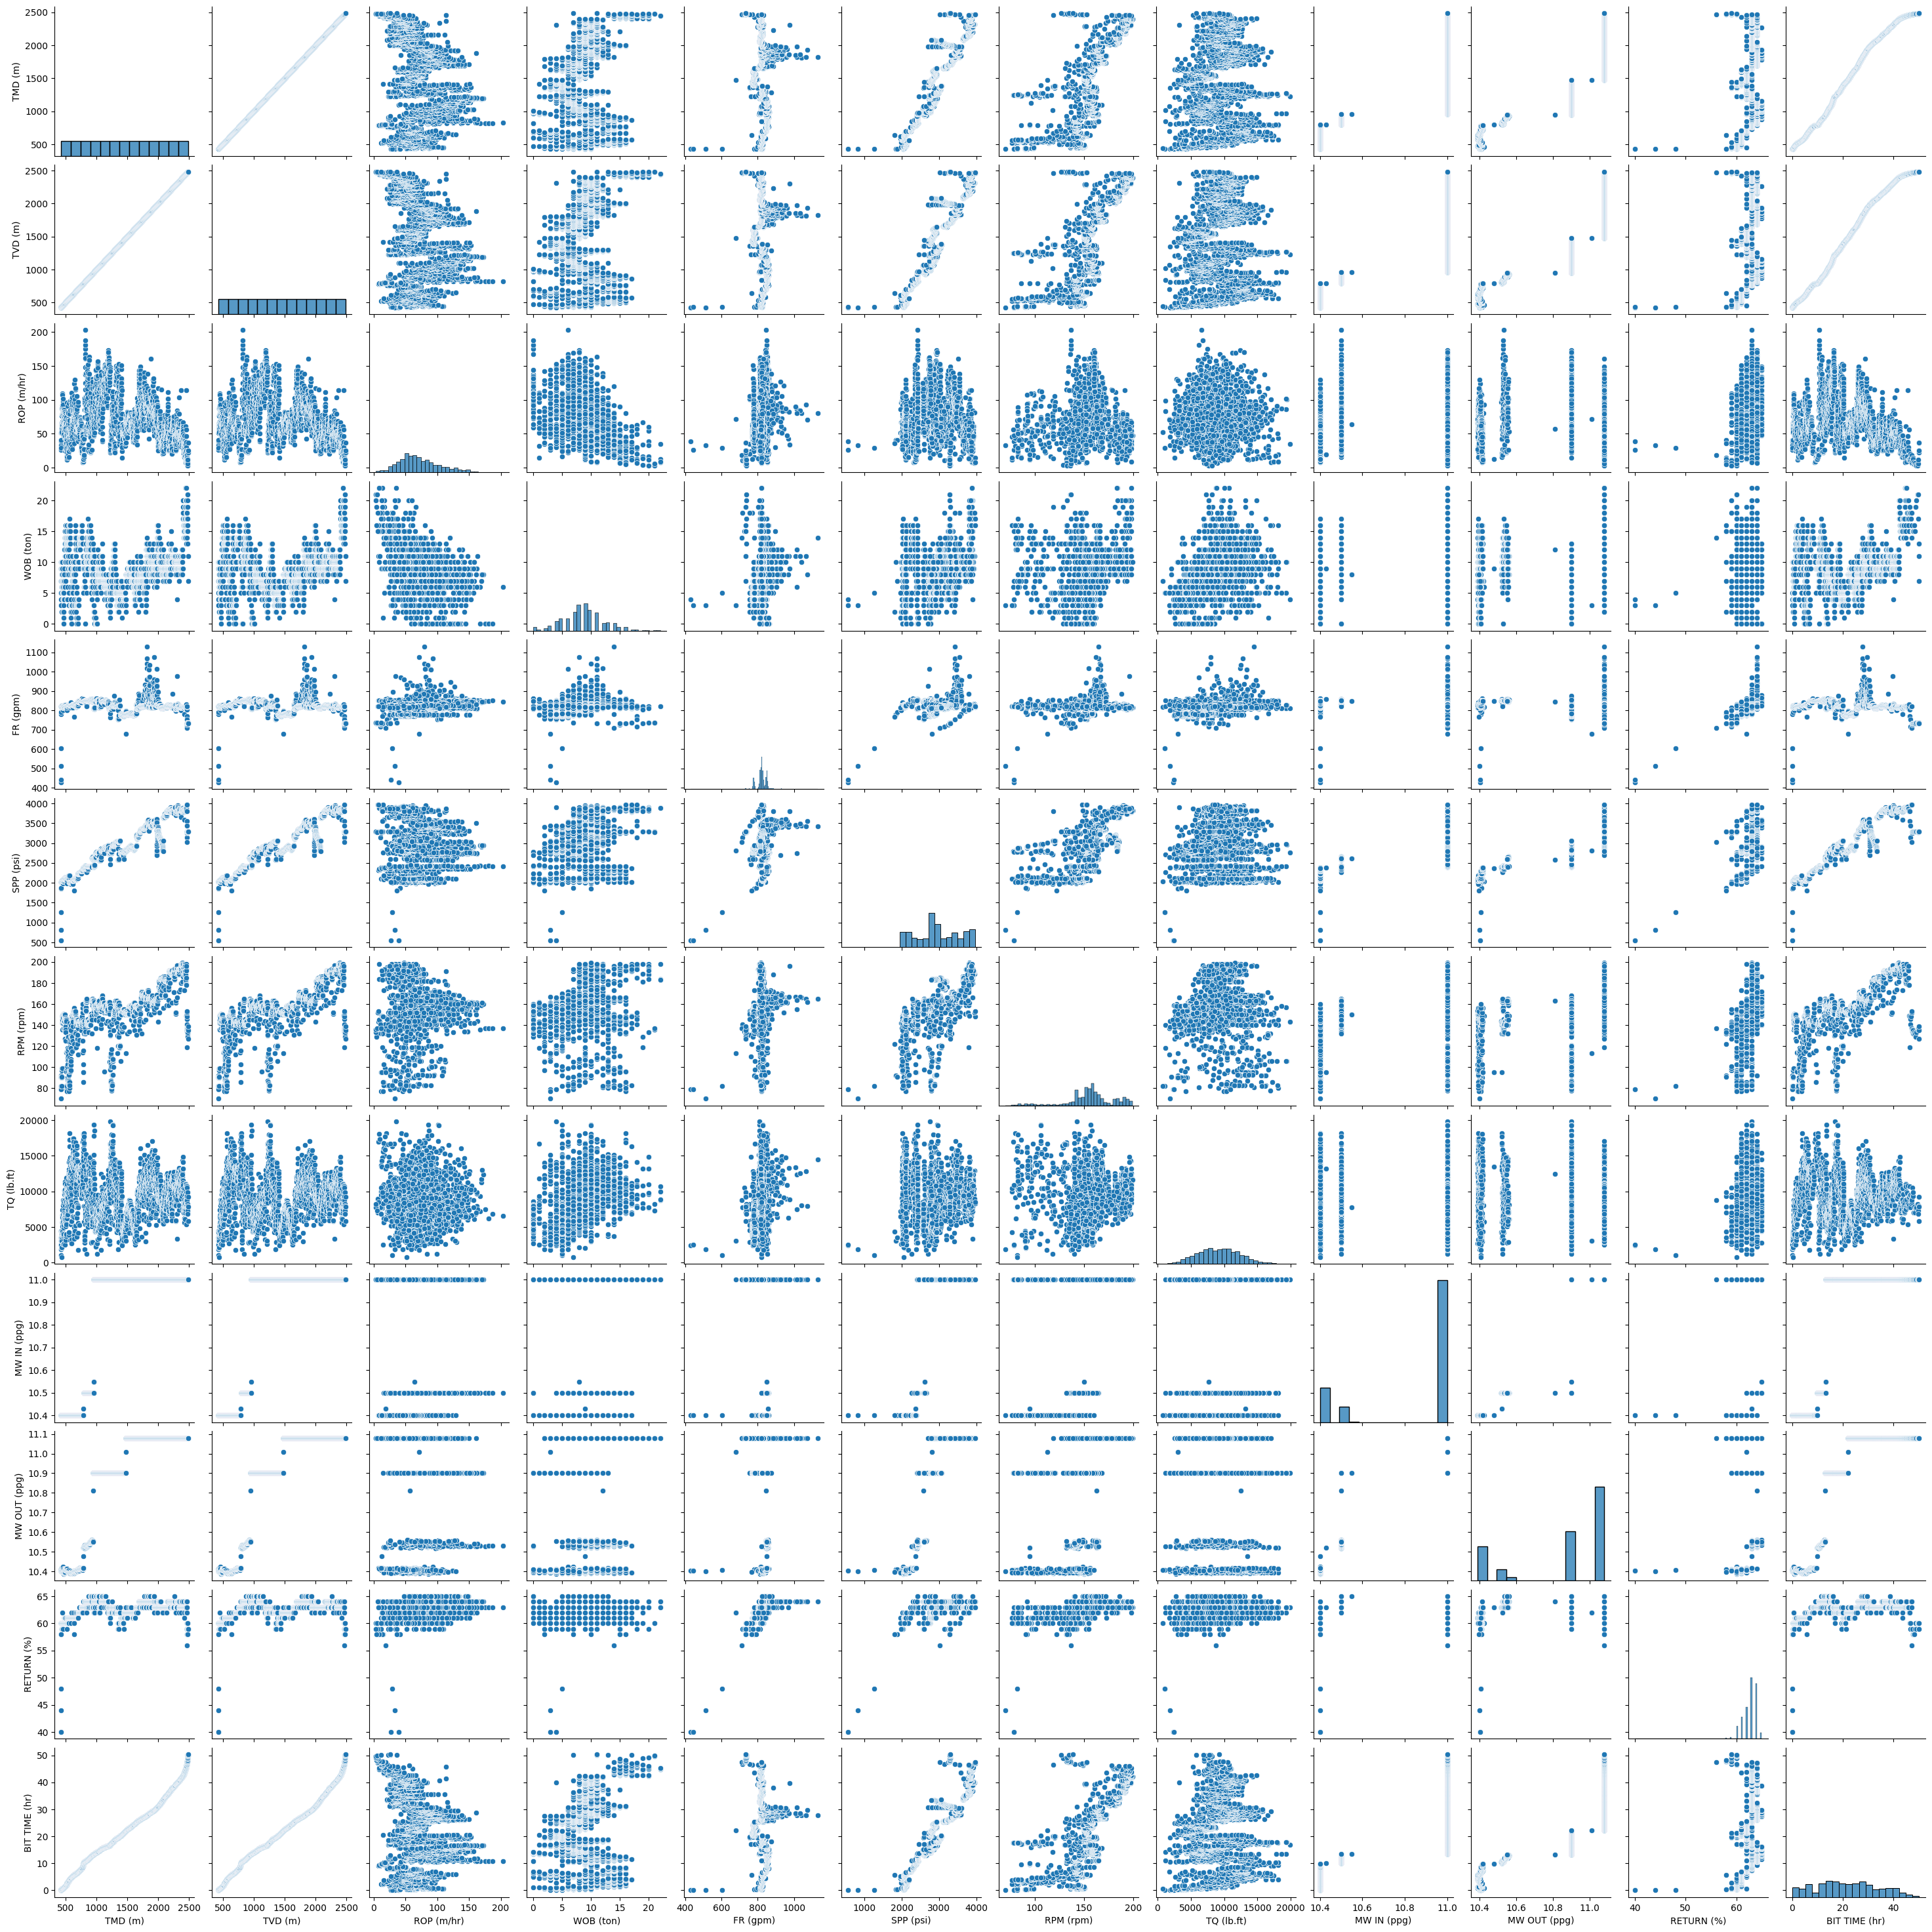

In [1757]:
sns.pairplot(data_up5)

**Correlation matrix** compute pairwise correlation of columns in dataframe. There are several method of correlation based on data type:
* Pearson
* Kendall
* Spearman

We can use `corr` method from pandas, which return another data frame of correlation coefficients between variables

In [1758]:
data_up5.corr(method='pearson')

/var/folders/w5/0trdcvnj2sl845mfj4rljf600000gn/T/ipykernel_52568/433944912.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_up5.corr(method='pearson')


TMD (m)   TVD (m)  ROP (m/hr)  WOB (ton)  FR (gpm)  SPP (psi)  \
TMD (m)        1.000000  1.000000   -0.227054   0.236270 -0.121767   0.948814   
TVD (m)        1.000000  1.000000   -0.227043   0.236264 -0.121764   0.948812   
ROP (m/hr)    -0.227054 -0.227043    1.000000  -0.405112  0.232410  -0.103467   
WOB (ton)      0.236270  0.236264   -0.405112   1.000000  0.139157   0.210405   
FR (gpm)      -0.121767 -0.121764    0.232410   0.139157  1.000000   0.053758   
SPP (psi)      0.948814  0.948812   -0.103467   0.210405  0.053758   1.000000   
RPM (rpm)      0.722908  0.722911   -0.022481   0.154641  0.082661   0.730816   
TQ (lb.ft)     0.064018  0.064014   -0.040455   0.396434  0.283229   0.115270   
MW IN (ppg)    0.765365  0.765362    0.118103  -0.128102 -0.139047   0.772071   
MW OUT (ppg)   0.879116  0.879119    0.010952  -0.003600 -0.132879   0.861910   
RETURN (%)     0.358008  0.358008    0.243881   0.132256  0.613617   0.517864   
BIT TIME (hr)  0.994750  0.994746   -0.241818   0.260203 -0.129167   0.942389   

               RPM (rpm)  TQ (lb.ft)  MW IN (ppg)  MW OUT (ppg)  RETURN (%)  \
TMD (m)         0.722908    0.064018     0.765365      0.879116    0.358008   
TVD (m)         0.722911    0.064014     0.765362      0.879119    0.358008   
ROP (m/hr)     -0.022481   -0.040455     0.118103      0.010952    0.243881   
WOB (ton)       0.154641    0.396434    -0.128102     -0.003600    0.132256   
FR (gpm)        0.082661    0.283229    -0.139047     -0.132879    0.613617   
SPP (psi)       0.730816    0.115270     0.772071      0.861910    0.517864   
RPM (rpm)       1.000000    0.007684     0.524779      0.618517    0.474464   
TQ (lb.ft)      0.007684    1.000000    -0.116015     -0.069147    0.216287   
MW IN (ppg)     0.524779   -0.116015     1.000000      0.953472    0.391870   
MW OUT (ppg)    0.618517   -0.069147     0.953472      1.000000    0.420085   
RETURN (%)      0.474464    0.216287     0.391870      0.420085    1.000000   
BIT TIME (hr)   0.723161    0.059622     0.749850      0.860783    0.359424   

               BIT TIME (hr)  
TMD (m)             0.994750  
TVD (m)             0.994746  
ROP (m/hr)         -0.241818  
WOB (ton)           0.260203  
FR (gpm)           -0.129167  
SPP (psi)           0.942389  
RPM (rpm)           0.723161  
TQ (lb.ft)          0.059622  
MW IN (ppg)         0.749850  
MW OUT (ppg)        0.860783  
RETURN (%)          0.359424  
BIT TIME (hr)       1.000000

Correlation matrix can be represented in color-coded **heatmap plot** (using `heatmap` from seaborn)

/var/folders/w5/0trdcvnj2sl845mfj4rljf600000gn/T/ipykernel_52568/866321558.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_up5.corr(method='pearson'), annot=True).set(title='UP-5')


[Text(0.5, 1.0, 'UP-5')]

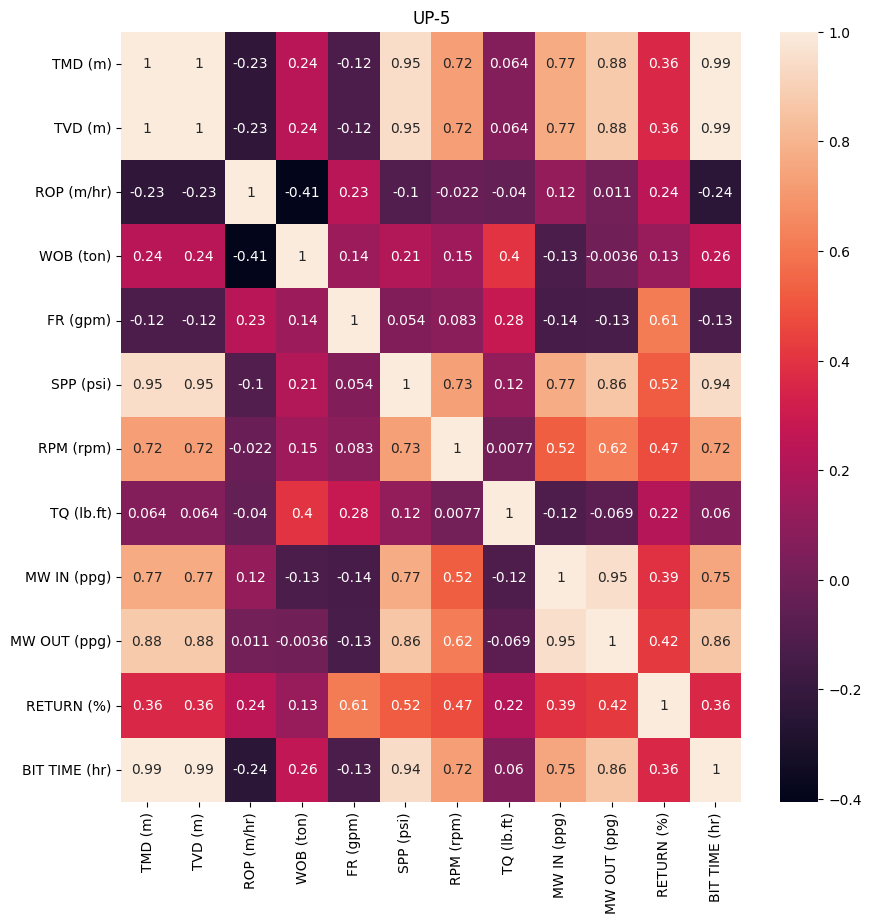

In [1759]:
plt.figure(figsize=(10,10))
sns.heatmap(data_up5.corr(method='pearson'), annot=True).set(title='UP-5')

# Preprocessing Dataset UP-5

In [1760]:
#read data

#data_up5 = pd.read_csv('https://raw.githubusercontent.com/ikiearth/DATASET-UTS-AI-Universitas-Pertamina/main/UP-5.csv')
data_up5.head()

Formation  TMD (m)  TVD (m)  ROP (m/hr)  WOB (ton)  FR (gpm)  SPP (psi)  \
0      Seno      428   428.01        33.3          3     514.3        818   
1      Seno      429   429.01        39.3          4     428.8        554   
2      Seno      430   430.00        26.7          3     442.7        547   
3      Seno      431   430.99        29.1          5     604.9       1259   
4      Seno      432   432.00        40.8         10     782.1       1846   

   RPM (rpm)  TQ (lb.ft)  MW IN (ppg)  MW OUT (ppg)  RETURN (%)  \
0         70        1915         10.4        10.401          44   
1         79        2383         10.4        10.403          40   
2         79        2499         10.4        10.405          40   
3         82        1080         10.4        10.407          48   
4         92        3106         10.4        10.409          58   

   BIT TIME (hr)            DATE TIME  
0           0.01  19/06/2010 07.12.15  
1           0.05  19/06/2010 07.14.23  
2           0.09  19/06/2010 07.16.43  
3           0.20  19/06/2010 09.04.13  
4           0.23  19/06/2010 09.05.52

In [1761]:
data_up5.columns

Index(['Formation', 'TMD (m)', 'TVD (m)', 'ROP (m/hr)', 'WOB (ton)',
       'FR (gpm)', 'SPP (psi)', 'RPM (rpm)', 'TQ (lb.ft)', 'MW IN (ppg)',
       'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)', 'DATE TIME'],
      dtype='object')

In [1762]:
#drop feature yang tidak diperlukan

data_up5.drop(['Formation', 'TMD (m)', 'FR (gpm)', 'SPP (psi)',  'TQ (lb.ft)', 'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)', 'DATE TIME'], axis=1, inplace=True)
data_up5.head()

TVD (m)  ROP (m/hr)  WOB (ton)  RPM (rpm)  MW IN (ppg)
0   428.01        33.3          3         70         10.4
1   429.01        39.3          4         79         10.4
2   430.00        26.7          3         79         10.4
3   430.99        29.1          5         82         10.4
4   432.00        40.8         10         92         10.4

[Text(0.5, 1.0, 'UP-5')]

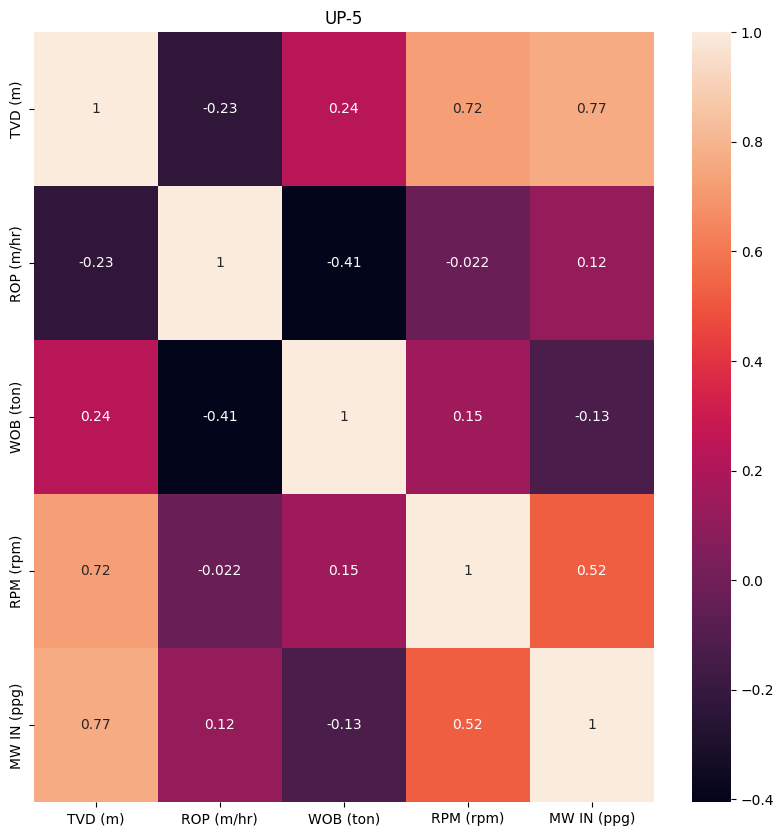

In [1763]:
plt.figure(figsize=(10,10))
sns.heatmap(data_up5.corr(method='pearson'), annot=True).set(title='UP-5')

In [1764]:
data_up5.describe()

TVD (m)   ROP (m/hr)    WOB (ton)    RPM (rpm)  MW IN (ppg)
count  2058.000000  2058.000000  2058.000000  2058.000000  2058.000000
mean   1456.411924    72.522935     8.744412   156.351312    10.852662
std     594.199795    32.636414     3.591133    23.840552     0.250399
min     428.010000     3.100000     0.000000    70.000000    10.400000
25%     942.177500    49.725000     7.000000   146.000000    10.500000
50%    1456.425000    67.200000     9.000000   158.000000    11.000000
75%    1970.667500    91.875000    11.000000   167.000000    11.000000
max    2484.790000   203.200000    22.000000   199.000000    11.000000

## Scaling and Normalization

In [1765]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()

In [1766]:
data_up5.head()

TVD (m)  ROP (m/hr)  WOB (ton)  RPM (rpm)  MW IN (ppg)
0   428.01        33.3          3         70         10.4
1   429.01        39.3          4         79         10.4
2   430.00        26.7          3         79         10.4
3   430.99        29.1          5         82         10.4
4   432.00        40.8         10         92         10.4

In [1767]:
minmax_scaler.fit(data_up5)
std_scaler.fit(data_up5)

data_minmax = minmax_scaler.transform(data_up5)
data_std = std_scaler.transform(data_up5)

In [1768]:
data_minmax= pd.DataFrame(data_minmax, columns= data_up5.columns)
data_minmax.describe()

TVD (m)   ROP (m/hr)    WOB (ton)    RPM (rpm)  MW IN (ppg)
count  2058.000000  2058.000000  2058.000000  2058.000000  2058.000000
mean      0.500006     0.346941     0.397473     0.669390     0.754436
std       0.288898     0.163101     0.163233     0.184810     0.417332
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.249987     0.233008     0.318182     0.589147     0.166667
50%       0.500012     0.320340     0.409091     0.682171     1.000000
75%       0.750035     0.443653     0.500000     0.751938     1.000000
max       1.000000     1.000000     1.000000     1.000000     1.000000

In [1769]:
data_minmax= pd.DataFrame(data_std, columns= data_up5.columns)
data_minmax.describe()

TVD (m)    ROP (m/hr)     WOB (ton)     RPM (rpm)   MW IN (ppg)
count  2058.000000  2.058000e+03  2.058000e+03  2.058000e+03  2.058000e+03
mean      0.000000  4.419313e-16 -5.524142e-17  2.209657e-16 -5.745107e-15
std       1.000243  1.000243e+00  1.000243e+00  1.000243e+00  1.000243e+00
min      -1.731155 -2.127679e+00 -2.435593e+00 -3.622915e+00 -1.808201e+00
25%      -0.865634 -6.987127e-01 -4.858734e-01 -4.342948e-01 -1.408741e+00
50%       0.000022 -1.631377e-01  7.118925e-02  6.917159e-02  5.885565e-01
75%       0.865669  5.931034e-01  6.282519e-01  4.467714e-01  5.885565e-01
max       1.731115  4.005000e+00  3.692096e+00  1.789348e+00  5.885565e-01

## Normalization

In [1770]:
data_up5_norm = data_up5

In [1771]:
from sklearn.preprocessing import normalize
data_normal_up5 = normalize(X= data_up5_norm, norm='l2', axis=1)

In [1772]:
data_normal_up5 = pd.DataFrame(data_normal_up5, columns= data_up5_norm.columns)
data_normal_up5.head()

TVD (m)  ROP (m/hr)  WOB (ton)  RPM (rpm)  MW IN (ppg)
0  0.983688    0.076533   0.006895   0.160880     0.023902
1  0.979181    0.089699   0.009130   0.180311     0.023737
2  0.981410    0.060939   0.006847   0.180306     0.023736
3  0.979886    0.066161   0.011368   0.186433     0.023645
4  0.973406    0.091933   0.022533   0.207299     0.023434

# Linear Regression

In [1773]:
X = data_normal_up5.drop(['ROP (m/hr)'], axis=1)
y = data_normal_up5['ROP (m/hr)']

In [1774]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [1775]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)


X_train_scaled = sc.transform(X_train)
X_train_scaled

array([[-0.39134899, -1.17031917,  0.48128975,  0.41942935],
       [-2.54134534,  1.06597951,  1.69663269,  2.98499731],
       [-1.09865353, -0.81552058,  1.53592171,  1.33254218],
       ...,
       [ 0.54478032, -0.37813842, -0.50299573, -0.41604498],
       [-2.33910517,  1.63184348,  1.83196119,  1.34805602],
       [ 0.51681955, -0.35546282, -0.4592173 , -0.37888528]])

In [1776]:
X_train.columns

Index(['TVD (m)', 'WOB (ton)', 'RPM (rpm)', 'MW IN (ppg)'], dtype='object')

In [1777]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_train_scaled.head()

TVD (m)  WOB (ton)  RPM (rpm)  MW IN (ppg)
0 -0.391349  -1.170319   0.481290     0.419429
1 -2.541345   1.065980   1.696633     2.984997
2 -1.098654  -0.815521   1.535922     1.332542
3  0.751467  -0.494316  -0.857345    -0.888954
4  0.605573  -0.342864  -0.608528    -0.690400

In [1778]:
X_test_scaled = sc.transform(X_test)

In [1779]:
X.columns

Index(['TVD (m)', 'WOB (ton)', 'RPM (rpm)', 'MW IN (ppg)'], dtype='object')

In [1780]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)

In [1781]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_scaled

TVD (m)  WOB (ton)  RPM (rpm)  MW IN (ppg)
0    0.604219  -0.427444  -0.621941    -0.496845
1    0.695458  -0.569052  -0.763095    -0.872254
2    0.201598  -0.805543  -0.152133    -0.213867
3   -1.881016   3.011586   1.663820     2.145565
4    0.487955  -0.838672  -0.339782    -0.322450
..        ...        ...        ...          ...
407 -0.872862   1.640088   1.286361     1.075981
408  0.729428  -0.548937  -0.822423    -0.960562
409  0.724626  -0.544415  -0.788721    -0.954633
410  0.587458  -0.508397  -0.559335    -0.629507
411 -0.075183  -0.420061   0.385697     0.435833

[412 rows x 4 columns]

In [1782]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

## Model elevation on training set

In [1783]:
y_pred_train = regressor.predict(X_train_scaled)

In [1784]:
from sklearn.metrics import r2_score

r2_score(y_train, y_pred_train)

0.7446983682621608

In [1785]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_pred_train, squared=False)

0.020727964759065708

Text(0.5, 1.0, 'using training set')

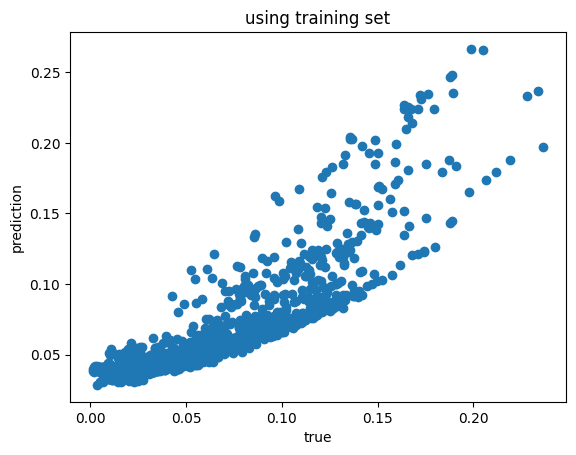

In [1786]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('true')
plt.ylabel('prediction')
plt.title('using training set')

## Model elevation on testing set

In [1787]:
y_pred_test = regressor.predict(X_test_scaled)

In [1788]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_test)

0.7028772552762172

In [1789]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_test, squared=False)

0.020411007804133203

Text(0.5, 1.0, 'using testing set')

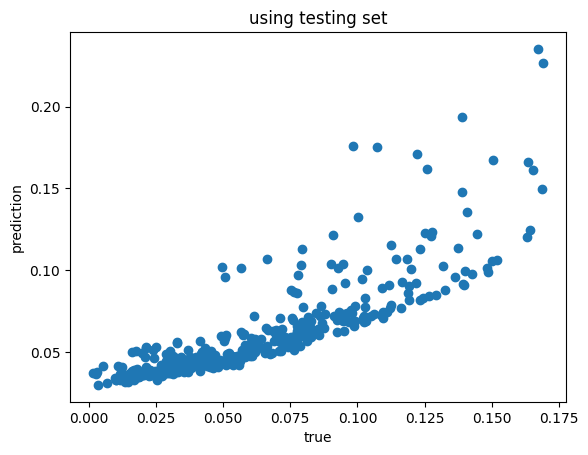

In [1790]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('true')
plt.ylabel('prediction')
plt.title('using testing set')

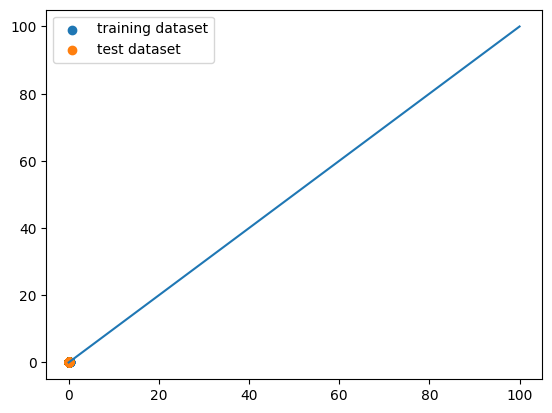

In [1791]:
plt.scatter(y_train, y_pred_train, label="training dataset")
plt.scatter(y_test, y_pred_test, label="test dataset")
plt.plot([0,100], [0,100])
plt.legend()

# Validation Curve and Learning Curve for Linear Regression

## Validation Curve

In [1792]:
param_range = np.logspace(-7,5,13)
param_range

array([1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])

In [1793]:
train_scores, test_scores = validation_curve(estimator=Ridge(),
                                             X=X_train_scaled,
                                             y=y_train,
                                             param_name='alpha',
                                             param_range=param_range,
                                             cv=10)

In [1794]:
pd.DataFrame(train_scores)

0         1         2         3         4         5         6  \
0   0.743623  0.746954  0.749405  0.741259  0.747680  0.745219  0.741060   
1   0.743623  0.746954  0.749405  0.741259  0.747680  0.745219  0.741060   
2   0.743623  0.746954  0.749405  0.741259  0.747680  0.745219  0.741060   
3   0.743623  0.746954  0.749405  0.741259  0.747680  0.745219  0.741060   
4   0.743623  0.746954  0.749405  0.741259  0.747680  0.745219  0.741060   
5   0.743623  0.746954  0.749405  0.741259  0.747680  0.745219  0.741060   
6   0.743623  0.746953  0.749404  0.741259  0.747680  0.745218  0.741060   
7   0.743585  0.746921  0.749372  0.741223  0.747648  0.745178  0.741021   
8   0.741027  0.744625  0.747119  0.738711  0.745418  0.742390  0.738409   
9   0.706199  0.710962  0.715526  0.703650  0.713334  0.703842  0.703767   
10  0.613673  0.616875  0.624644  0.610764  0.624089  0.606607  0.612475   
11  0.305680  0.308085  0.313204  0.305357  0.316752  0.299127  0.309039   
12  0.049531  0.050046  0.051013  0.049475  0.051799  0.047991  0.050439   

           7         8         9  
0   0.745990  0.743644  0.743884  
1   0.745990  0.743644  0.743884  
2   0.745990  0.743644  0.743884  
3   0.745990  0.743644  0.743884  
4   0.745990  0.743644  0.743884  
5   0.745990  0.743644  0.743884  
6   0.745990  0.743644  0.743883  
7   0.745955  0.743608  0.743851  
8   0.743514  0.741079  0.741575  
9   0.708432  0.704957  0.707819  
10  0.614485  0.608543  0.616889  
11  0.311542  0.301161  0.313835  
12  0.051080  0.048663  0.051544

In [1795]:
pd.DataFrame(test_scores)

0         1         2         3         4         5         6  \
0   0.753512  0.720548  0.702038  0.769890  0.713732  0.733109  0.774883   
1   0.753512  0.720548  0.702038  0.769890  0.713732  0.733109  0.774883   
2   0.753512  0.720548  0.702038  0.769890  0.713732  0.733109  0.774883   
3   0.753512  0.720548  0.702038  0.769890  0.713732  0.733109  0.774883   
4   0.753513  0.720547  0.702037  0.769890  0.713731  0.733111  0.774883   
5   0.753516  0.720544  0.702025  0.769892  0.713720  0.733128  0.774888   
6   0.753544  0.720509  0.701903  0.769908  0.713609  0.733299  0.774932   
7   0.753781  0.720147  0.700684  0.770036  0.712491  0.734935  0.775307   
8   0.752854  0.715689  0.688660  0.768749  0.701485  0.745701  0.774752   
9   0.716337  0.684578  0.626906  0.735867  0.641339  0.748188  0.732419   
10  0.623889  0.624228  0.543178  0.631935  0.530921  0.670637  0.617617   
11  0.314627  0.331305  0.278688  0.307916  0.267213  0.340124  0.295420   
12  0.050754  0.054651  0.044815  0.041916  0.044119  0.054969  0.044391   

           7         8         9  
0   0.731133  0.752903  0.750584  
1   0.731133  0.752903  0.750584  
2   0.731133  0.752903  0.750584  
3   0.731133  0.752903  0.750583  
4   0.731133  0.752903  0.750583  
5   0.731136  0.752909  0.750579  
6   0.731165  0.752968  0.750535  
7   0.731423  0.753512  0.750087  
8   0.731600  0.756135  0.744972  
9   0.707930  0.742168  0.706258  
10  0.610902  0.671135  0.594682  
11  0.292790  0.339312  0.290709  
12  0.045500  0.054526  0.045410

In [1796]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

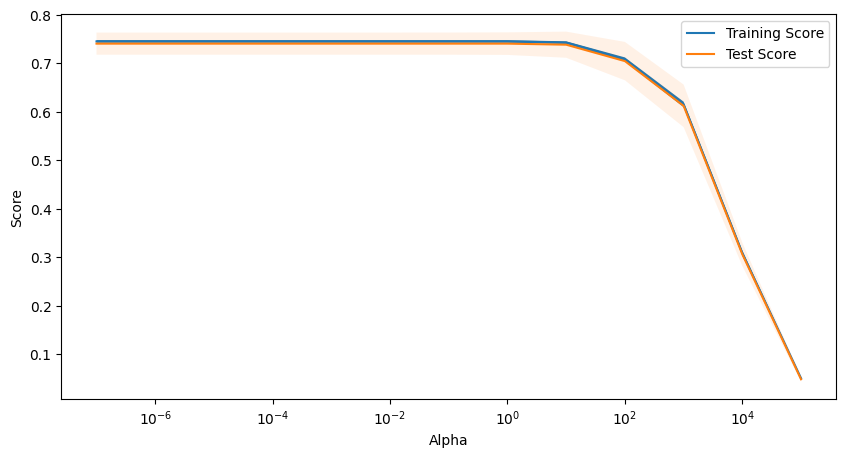

In [1797]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))
axes.semilogx(param_range, train_scores_mean, label='Training Score')
axes.semilogx(param_range, test_scores_mean, label='Test Score')

axes.fill_between(param_range,
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std)

axes.fill_between(param_range,
                  test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std,
                  alpha=0.1)

axes.set_xlabel('Alpha')
axes.set_ylabel('Score')
axes.legend()

## Learning Curve 

In [1798]:
train_sizes=np.linspace(0.05,1,9)

In [1799]:
train_sizes_abs, train_scores, test_scores = learning_curve(Ridge(), 
                                                            X_train_scaled, 
                                                            y_train, 
                                                            train_sizes=np.linspace(0.05,1,9),
                                                            cv=10)

In [1800]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

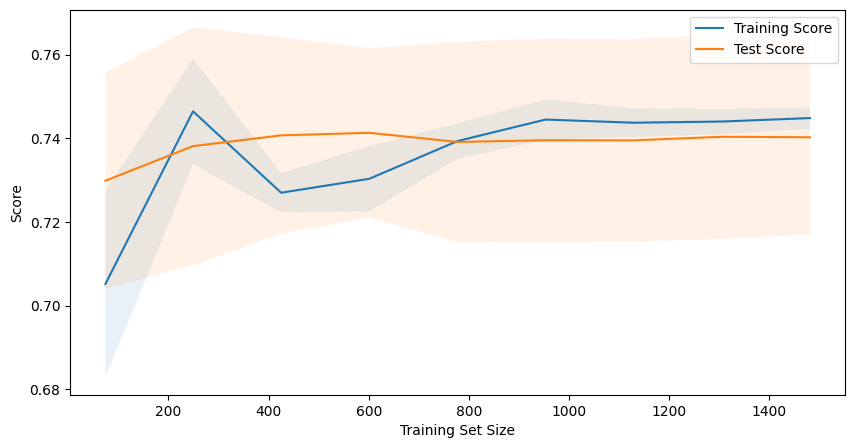

In [1801]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))
axes.plot(train_sizes_abs, train_scores_mean, label='Training Score')
axes.plot(train_sizes_abs, test_scores_mean, label='Test Score')

axes.fill_between(train_sizes_abs,
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  alpha=0.1)

axes.fill_between(train_sizes_abs,
                  test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std,
                  alpha=0.1)

axes.set_xlabel('Training Set Size')
axes.set_ylabel('Score')
axes.legend()

# Hyperparameter Tuning for Linear Regression

In [1802]:
from sklearn.model_selection import GridSearchCV

# define searching domain (with grid search)
param_grid = {'solver':['auto', 'svd', 'cholesky'],
              'alpha': np.logspace(-7,5,5)}

# create search command
search = GridSearchCV(estimator=Ridge(),
                      param_grid=param_grid,
                      scoring='r2',
                      cv=5)

# command search step by training
search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.e-07, 1.e-04, 1.e-01, 1.e+02, 1.e+05]),
                         'solver': ['auto', 'svd', 'cholesky']},
             scoring='r2')

In [1803]:
search.best_params_

{'alpha': 0.1, 'solver': 'auto'}

In [1804]:
model_optimized5 = search.best_estimator_

In [1805]:
model_optimized5.fit(X_train_scaled, y_train)

Ridge(alpha=0.1)

# Evaluation on Testing Set

In [1806]:
y_pred_test = model_optimized5.predict(X_test_scaled)

Text(0.5, 1.0, 'using testing set')

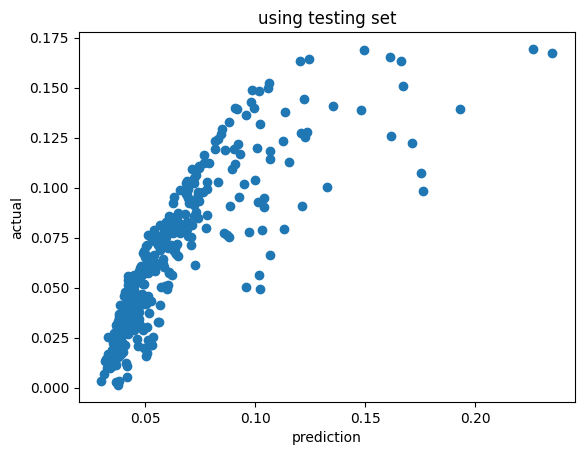

In [1807]:
plt.scatter(y_pred_test, y_test)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('using testing set')

In [1808]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.7028231016111013

# Evauation on Training Set

In [1809]:
y_pred_train = model_optimized5.predict(X_train_scaled)

Text(0.5, 1.0, 'using training set')

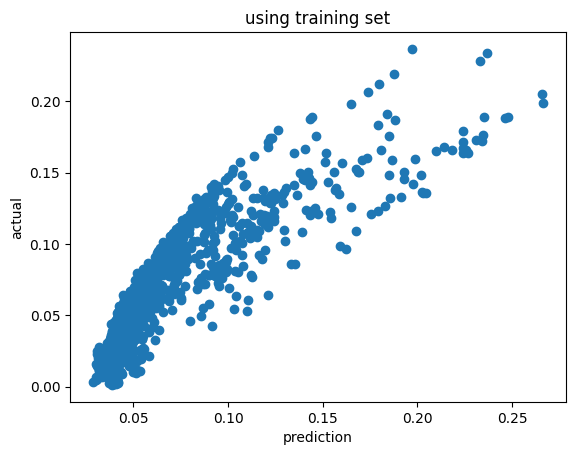

In [1810]:
plt.scatter(y_pred_train, y_train)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('using training set')

In [1811]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.7446980691712852

## Permutation Feature Importance for Linear Regression

In [1812]:
from sklearn.inspection import permutation_importance

In [1813]:
r = permutation_importance(model_optimized5,
                           X_train_scaled,
                           y_train,
                           n_repeats=10)

In [1814]:
for i in r.importances_mean.argsort()[::-1]:
  if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    print(f'{X_train.columns[i]:<8}\t'
          f'{r.importances_mean[i]:.3f}'
          f' +/- {r.importances_std[i]:.3f}')

TVD (m) 	3.890 +/- 0.088
RPM (rpm)	1.432 +/- 0.050
MW IN (ppg)	0.310 +/- 0.011
WOB (ton)	0.078 +/- 0.007


In [1815]:
tree_feature_importances = r.importances_mean
tree_feature_importances

array([3.89016198, 0.07764729, 1.43240475, 0.31026442])

In [1816]:
sorted_idx = tree_feature_importances.argsort()
sorted_idx

array([1, 3, 2, 0])

[Text(0, 0, 'WOB (ton)'),
 Text(0, 1, 'MW IN (ppg)'),
 Text(0, 2, 'RPM (rpm)'),
 Text(0, 3, 'TVD (m)')]

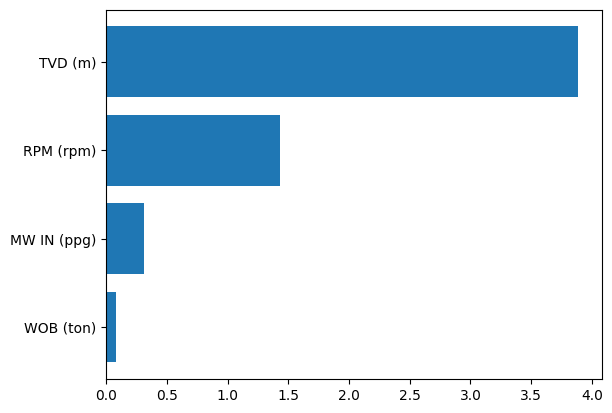

In [1817]:
fig, ax = plt.subplots()
y_ticks = np.arange(0, len(X_train.columns))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(X.columns[sorted_idx])

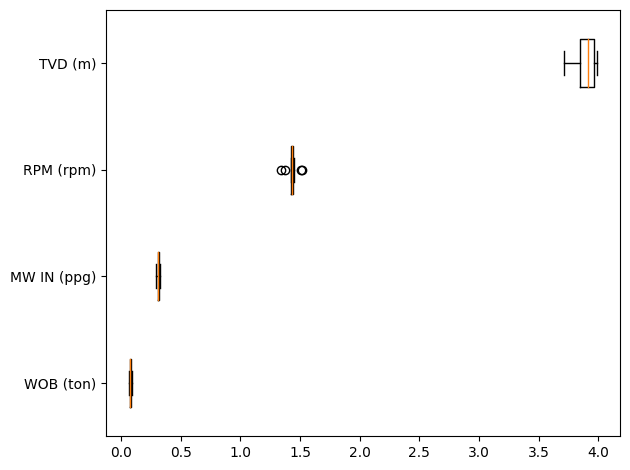

In [1818]:
fig, ax = plt.subplots()
ax.boxplot(r.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
fig.tight_layout()
plt.show()

In [1819]:
r.importances_mean

array([3.89016198, 0.07764729, 1.43240475, 0.31026442])

In [1820]:
r.importances_std

array([0.0878861 , 0.00678889, 0.04972118, 0.01080532])

# Result Interpretation

In [1821]:
regressor.intercept_

0.06180977708524759

In [1822]:
regressor.coef_

array([-0.05733091, -0.00804035, -0.03479721,  0.01615608])

## Prediction using The Model

In [2002]:
input_TVD = 428.1
input_WOB = 3
input_RPM = 70
input_MW_IN = 10.4

In [2003]:
input = np.array([input_TVD, 
                  input_WOB, 
                  input_RPM, 
                  input_MW_IN]).reshape(1, -1)
input

array([[428.1,   3. ,  70. ,  10.4]])

In [2005]:
output = regressor.predict(sc.transform(input))
output

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([39.16926646])

## Cross Validation

In [1826]:
from sklearn.model_selection import cross_val_score

cross_val_score(estimator=regressor, X=X_train_scaled, y=y_train, cv=5)

array([0.73862529, 0.73768526, 0.7330339 , 0.75261042, 0.75388882])

In [1827]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator= regressor, X= X_train_scaled, y= y_train, cv= 10)
scores

array([0.75351241, 0.72054759, 0.70203821, 0.76988978, 0.71373249,
       0.73310905, 0.77488281, 0.73113255, 0.75290257, 0.75058353])

In [1828]:
np.mean(scores)

0.7402330999055803

In [1829]:
np.std(scores)

0.02281738654805714

# Random Forest Regressor

In [1830]:
#data_up5.drop(['Formation', 'TVD (m)', 'FR (gpm)', 'SPP (psi)',  'TQ (lb.ft)', 'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)', 'DATE TIME'], axis=1, inplace=True)
data_up5.head()

TVD (m)  ROP (m/hr)  WOB (ton)  RPM (rpm)  MW IN (ppg)
0   428.01        33.3          3         70         10.4
1   429.01        39.3          4         79         10.4
2   430.00        26.7          3         79         10.4
3   430.99        29.1          5         82         10.4
4   432.00        40.8         10         92         10.4

In [1831]:
X = data_up5.drop(['ROP (m/hr)'], axis=1)
y = data_up5['ROP (m/hr)']

In [1832]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [1833]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [1834]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))

0.8211384525148512
0.9698849148521307


# Model Evaluation and Inspection

In [1835]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Validation Curve and Learning Curve for Random Forest Regressor

# Validation Curve

In [1836]:
param_range=np.arange(1,6)
param_name='max_depth'
train_scores, valid_scores = validation_curve(RandomForestRegressor(), X_train,
                                              y_train, param_name=param_name,
                                              param_range=param_range, cv=10)

In [1837]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

Text(0, 0.5, 'Score')

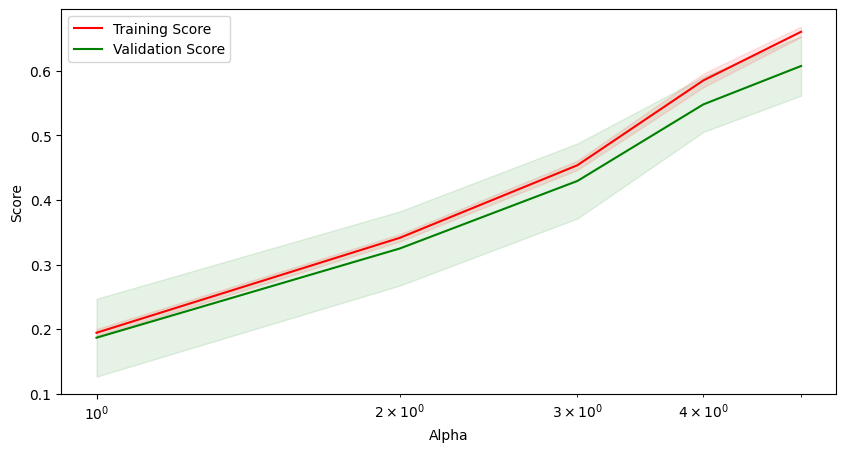

In [1838]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.semilogx(param_range, train_scores_mean, label='Training Score', color='red')
axes.semilogx(param_range, valid_scores_mean, label='Validation Score', color='green')
axes.fill_between(param_range, 
                  valid_scores_mean - valid_scores_std,
                  valid_scores_mean + valid_scores_std,
                  color='green',
                  alpha=0.1)
axes.fill_between(param_range, 
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  color='red',
                  alpha=0.1)
axes.legend()
axes.set_xlabel('Alpha')
axes.set_ylabel('Score')

## Learning Curve

In [1839]:
train_sizes = np.linspace(0.05, 1, 9)

In [1840]:
train_sizes = np.linspace(0.05,1,12)
train_sizes, train_scores, valid_scores, fit_times, _ = learning_curve(RandomForestRegressor(), X_train,
                                                                  y_train, train_sizes=train_sizes, cv=10,
                                                                  return_times=True)

In [1841]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

Text(0, 0.5, 'Score')

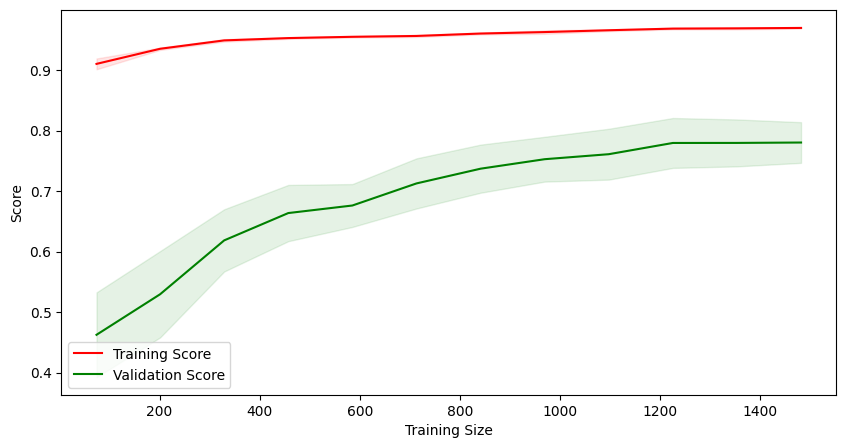

In [1842]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.plot(train_sizes, train_scores_mean, label='Training Score', color='red')
axes.plot(train_sizes, valid_scores_mean, label='Validation Score', color='green')
axes.fill_between(train_sizes, 
                  valid_scores_mean - valid_scores_std,
                  valid_scores_mean + valid_scores_std,
                  color='green',
                  alpha=0.1)
axes.fill_between(train_sizes, 
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  color='red',
                  alpha=0.1)
axes.legend()
axes.set_xlabel('Training Size')
axes.set_ylabel('Score')

# Hyperparameter Tuning for Random Forest Regressor

In [1843]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_distributions = {'n_estimators': sp_randint(50, 200),
                       'max_features': sp_randint(0, 10),
                       'max_depth': sp_randint(3, 20),}
print(param_distributions)
random_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions, scoring='r2', cv=10)

random_search.fit(X_train, y_train)

{'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x35e618f40>, 'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x35e696410>, 'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x35e6963b0>}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x35e6963b0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x35e696410>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x35e618f40>},
                   scoring='r2')

In [1844]:
random_search.best_params_

{'max_depth': 19, 'max_features': 8, 'n_estimators': 170}

# Evauation on Testing Set

In [1845]:
model5 = random_search.best_estimator_

model5.fit(X_train, y_train)

y_pred_train = model5.predict(X_train)
y_pred_test = model5.predict(X_test)

Text(0.5, 1.0, 'using testing set')

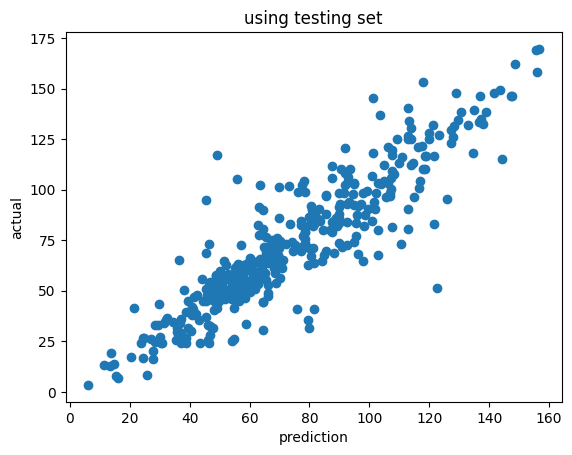

In [1846]:
plt.scatter(y_pred_test, y_test)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('using testing set')

In [1847]:
# see blind set score
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_test)

0.8199102062655024

# Evaluation on Training Set

Text(0.5, 1.0, 'using training set')

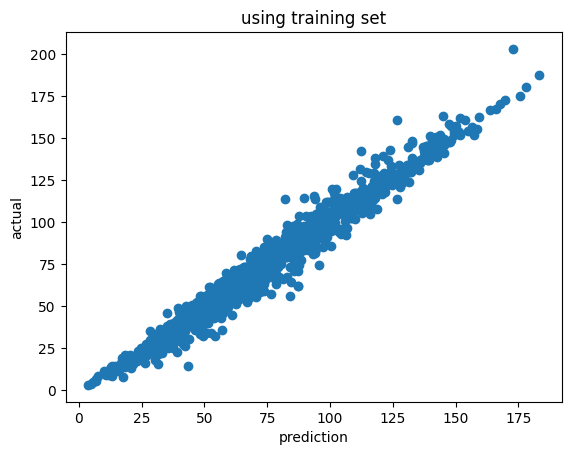

In [1848]:
plt.scatter(y_pred_train, y_train)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('using training set')

In [1849]:
# see blind set score
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.970590169162042

# Permutation Feature Importance for Random Forest Regressor

In [1850]:
from sklearn.inspection import permutation_importance

In [1851]:
r = permutation_importance(model5,
                           X_train,
                           y_train,
                           n_repeats=10)

In [1852]:
for i in r.importances_mean.argsort()[::-1]:
  if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    print(f'{X_train.columns[i]:<8}\t'
          f'{r.importances_mean[i]:.3f}'
          f' +/- {r.importances_std[i]:.3f}')

TVD (m) 	1.230 +/- 0.024
WOB (ton)	0.425 +/- 0.030
RPM (rpm)	0.392 +/- 0.015
MW IN (ppg)	0.003 +/- 0.000


In [1853]:
tree_feature_importances = r.importances_mean
tree_feature_importances

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


array([1.229604  , 0.42470142, 0.39182282, 0.00329443])

In [1854]:
sorted_idx = tree_feature_importances.argsort()
sorted_idx

array([3, 2, 1, 0])

[Text(0, 0, 'MW IN (ppg)'),
 Text(0, 1, 'RPM (rpm)'),
 Text(0, 2, 'WOB (ton)'),
 Text(0, 3, 'TVD (m)')]

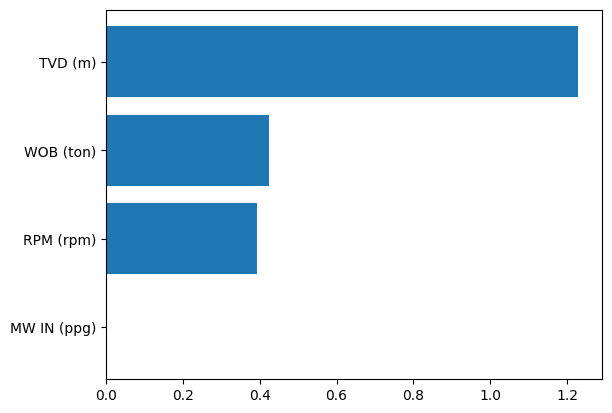

In [1855]:
fig, ax = plt.subplots()
y_ticks = np.arange(0, len(X_train.columns))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(X.columns[sorted_idx])

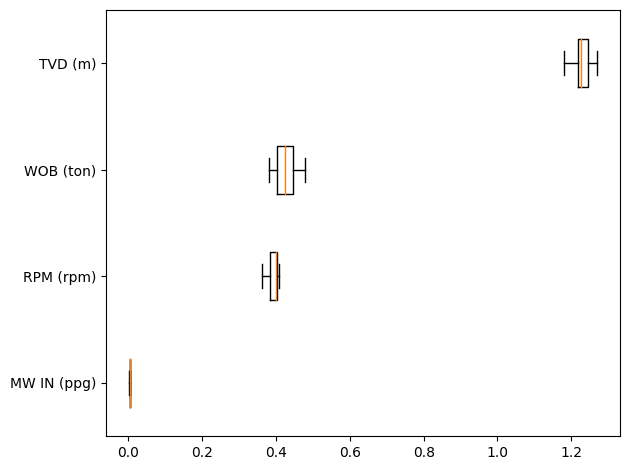

In [1856]:
fig, ax = plt.subplots()
ax.boxplot(r.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
fig.tight_layout()
plt.show()

In [1857]:
r.importances_mean

array([1.229604  , 0.42470142, 0.39182282, 0.00329443])

In [1858]:
r.importances_std

array([0.02359404, 0.02995558, 0.01466909, 0.00028066])

## Prediction Using the Model

In [1859]:
input_TVD = 428.1
input_WOB = 3
input_RPM = 70
input_MW_IN = 10.4

In [1999]:
input = np.array([input_TVD, 
                  input_WOB, 
                  input_RPM, 
                  input_MW_IN]).reshape(1, -1)
input

array([[428.1,   3. ,  70. ,  10.4]])

In [2001]:
output = model5.predict(input)
output

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([34.30352941])

# Dataset UP-6

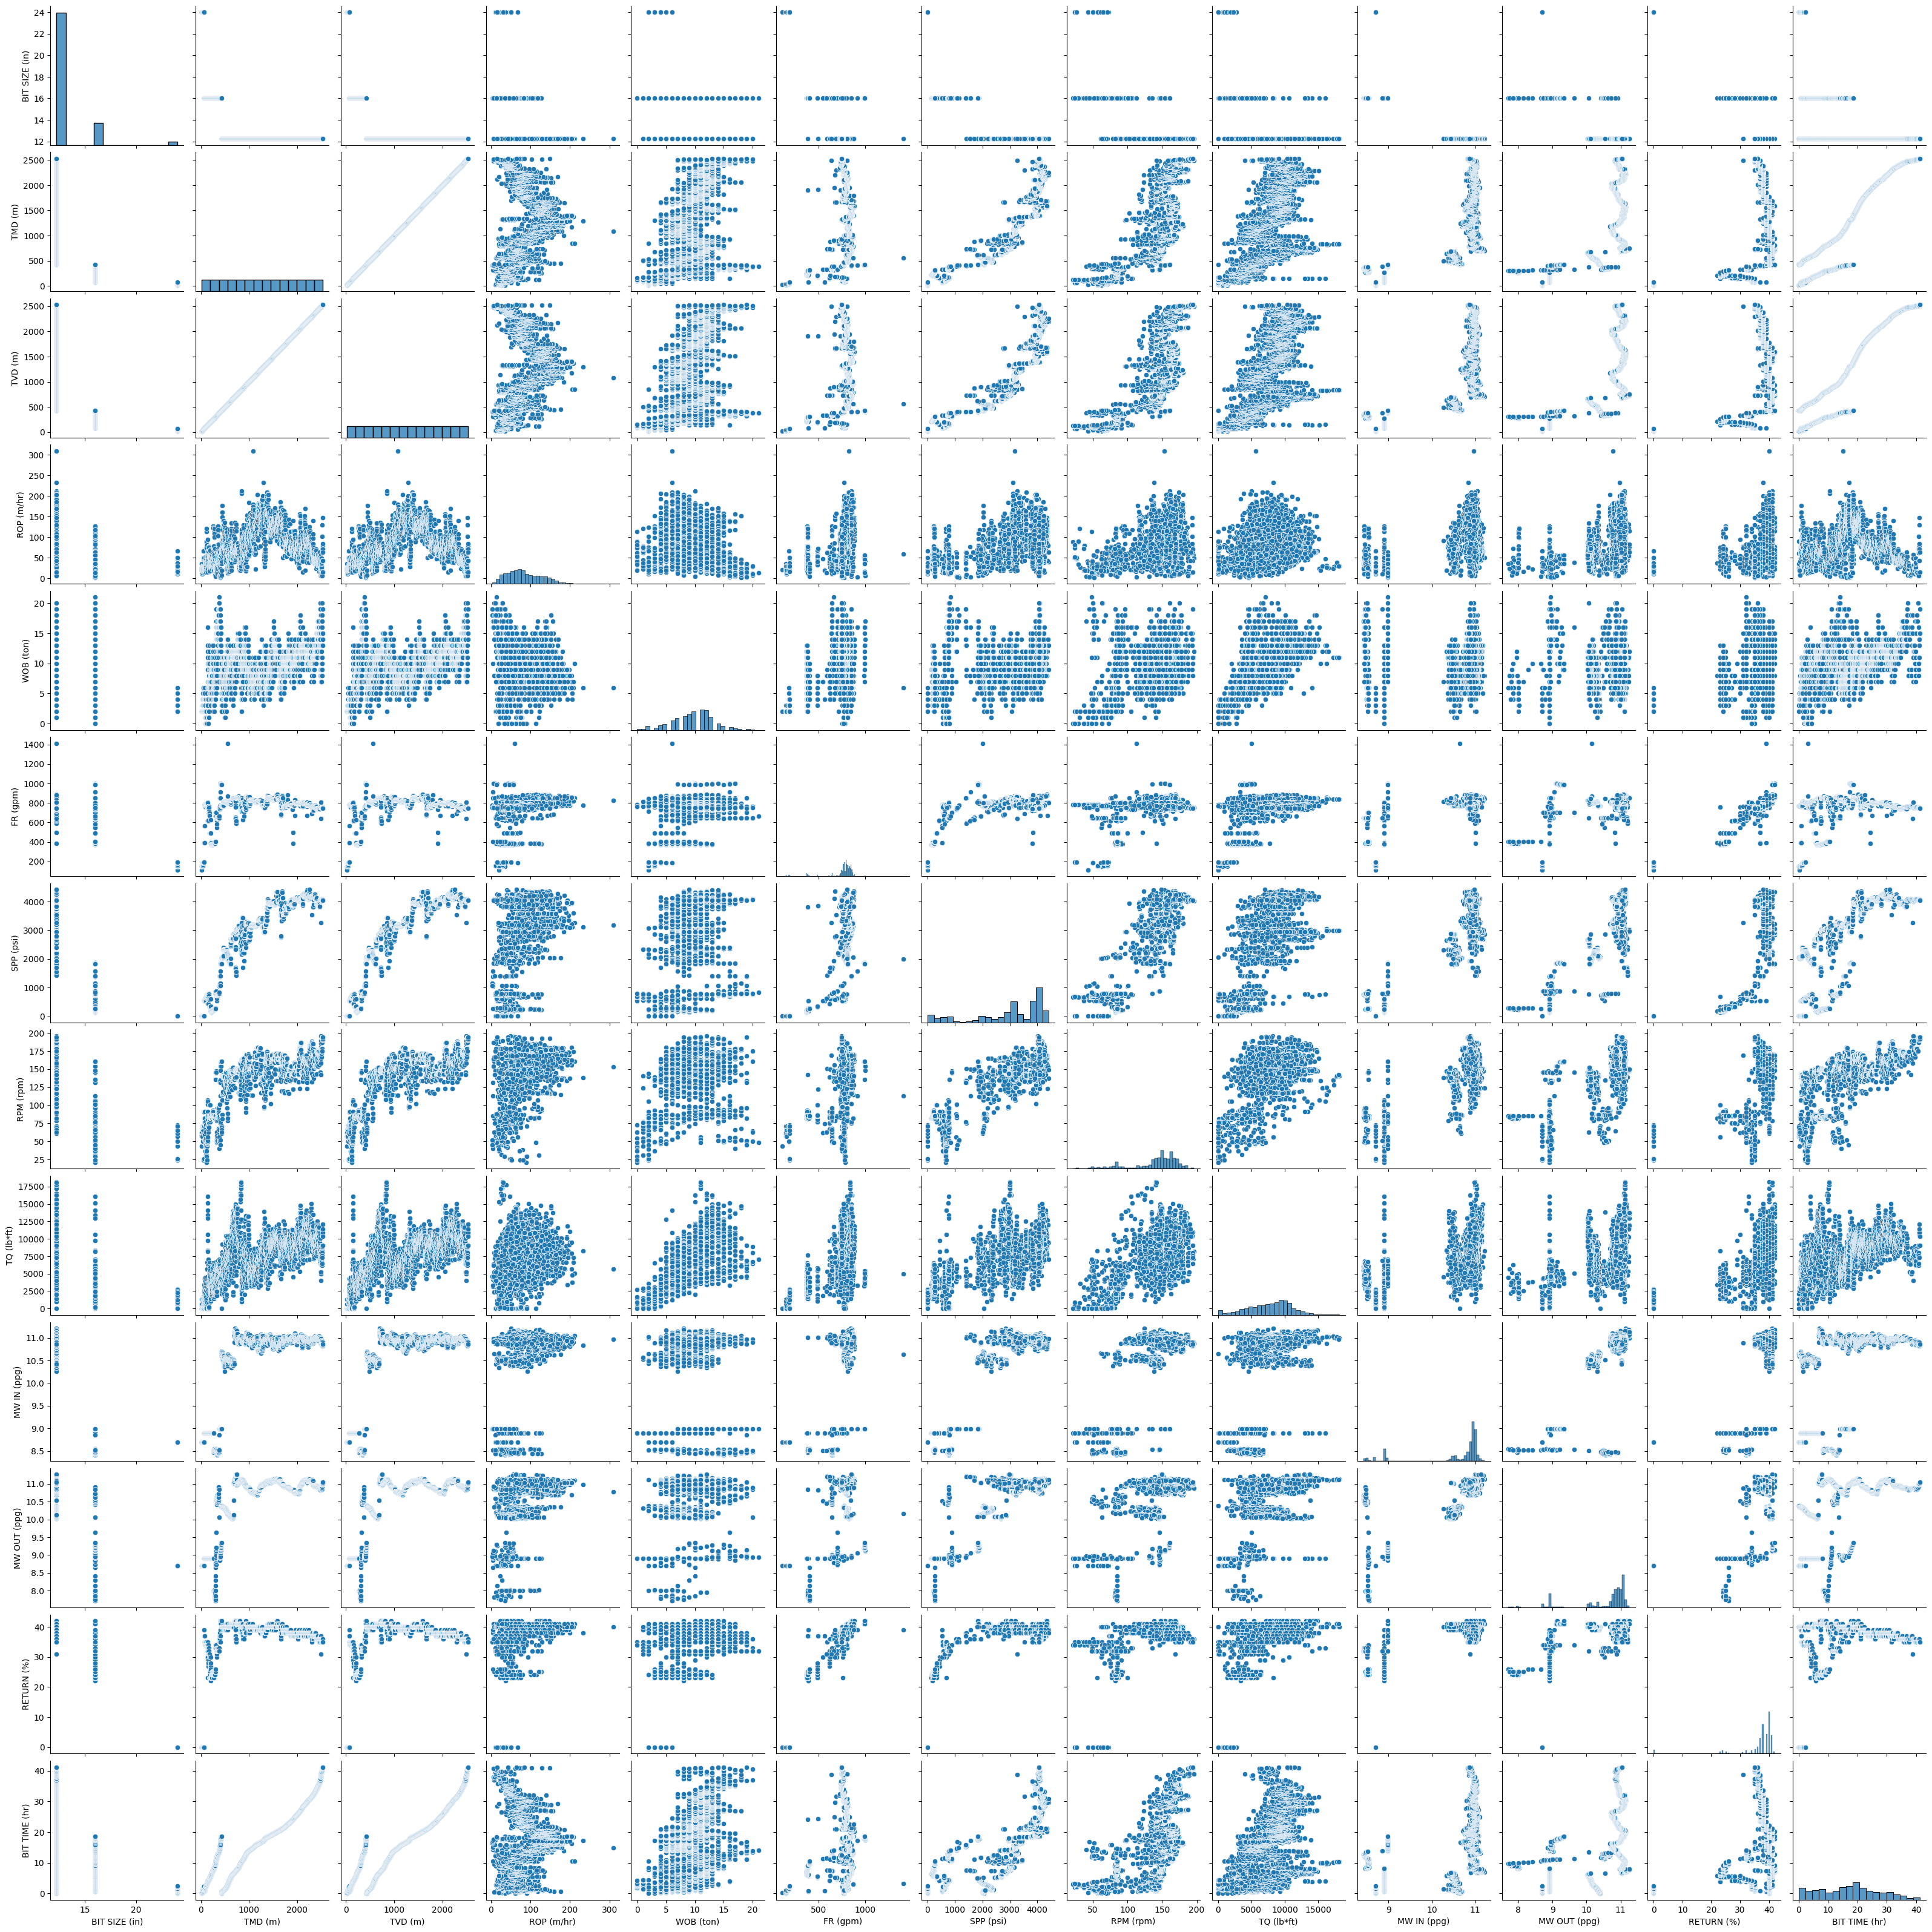

In [1862]:
sns.pairplot(data_up6)

**Correlation matrix** compute pairwise correlation of columns in dataframe. There are several method of correlation based on data type:
* Pearson
* Kendall
* Spearman

We can use `corr` method from pandas, which return another data frame of correlation coefficients between variables

In [1863]:
data_up6.corr(method='pearson')

/var/folders/w5/0trdcvnj2sl845mfj4rljf600000gn/T/ipykernel_52568/2442845181.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_up6.corr(method='pearson')


BIT SIZE (in)   TMD (m)   TVD (m)  ROP (m/hr)  WOB (ton)  \
BIT SIZE (in)       1.000000 -0.564561 -0.564697   -0.395906  -0.345071   
TMD (m)            -0.564561  1.000000  1.000000    0.213169   0.438040   
TVD (m)            -0.564697  1.000000  1.000000    0.213224   0.438084   
ROP (m/hr)         -0.395906  0.213169  0.213224    1.000000  -0.135966   
WOB (ton)          -0.345071  0.438040  0.438084   -0.135966   1.000000   
FR (gpm)           -0.806407  0.361647  0.361773    0.378144   0.290254   
SPP (psi)          -0.765866  0.888552  0.888589    0.428617   0.404253   
RPM (rpm)          -0.725579  0.713320  0.713368    0.442368   0.397486   
TQ (lb*ft)         -0.587793  0.602749  0.602798    0.164085   0.683036   
MW IN (ppg)        -0.839315  0.696235  0.696284    0.435029   0.275437   
MW OUT (ppg)       -0.780813  0.690205  0.690258    0.442725   0.404190   
RETURN (%)         -0.917750  0.349969  0.350125    0.377494   0.313981   
BIT TIME (hr)      -0.425614  0.956735  0.956732    0.123662   0.484094   

               FR (gpm)  SPP (psi)  RPM (rpm)  TQ (lb*ft)  MW IN (ppg)  \
BIT SIZE (in) -0.806407  -0.765866  -0.725579   -0.587793    -0.839315   
TMD (m)        0.361647   0.888552   0.713320    0.602749     0.696235   
TVD (m)        0.361773   0.888589   0.713368    0.602798     0.696284   
ROP (m/hr)     0.378144   0.428617   0.442368    0.164085     0.435029   
WOB (ton)      0.290254   0.404253   0.397486    0.683036     0.275437   
FR (gpm)       1.000000   0.658340   0.599569    0.464492     0.664933   
SPP (psi)      0.658340   1.000000   0.837415    0.671081     0.894277   
RPM (rpm)      0.599569   0.837415   1.000000    0.578699     0.798945   
TQ (lb*ft)     0.464492   0.671081   0.578699    1.000000     0.625198   
MW IN (ppg)    0.664933   0.894277   0.798945    0.625198     1.000000   
MW OUT (ppg)   0.661712   0.869063   0.765616    0.639410     0.894667   
RETURN (%)     0.931962   0.624811   0.604082    0.482882     0.678333   
BIT TIME (hr)  0.262606   0.772767   0.632593    0.512618     0.515321   

               MW OUT (ppg)  RETURN (%)  BIT TIME (hr)  
BIT SIZE (in)     -0.780813   -0.917750      -0.425614  
TMD (m)            0.690205    0.349969       0.956735  
TVD (m)            0.690258    0.350125       0.956732  
ROP (m/hr)         0.442725    0.377494       0.123662  
WOB (ton)          0.404190    0.313981       0.484094  
FR (gpm)           0.661712    0.931962       0.262606  
SPP (psi)          0.869063    0.624811       0.772767  
RPM (rpm)          0.765616    0.604082       0.632593  
TQ (lb*ft)         0.639410    0.482882       0.512618  
MW IN (ppg)        0.894667    0.678333       0.515321  
MW OUT (ppg)       1.000000    0.667644       0.562503  
RETURN (%)         0.667644    1.000000       0.244684  
BIT TIME (hr)      0.562503    0.244684       1.000000

Correlation matrix can be represented in color-coded **heatmap plot** (using `heatmap` from seaborn)

/var/folders/w5/0trdcvnj2sl845mfj4rljf600000gn/T/ipykernel_52568/73810749.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_up6.corr(method='pearson'), annot=True).set(title='UP-6')


[Text(0.5, 1.0, 'UP-6')]

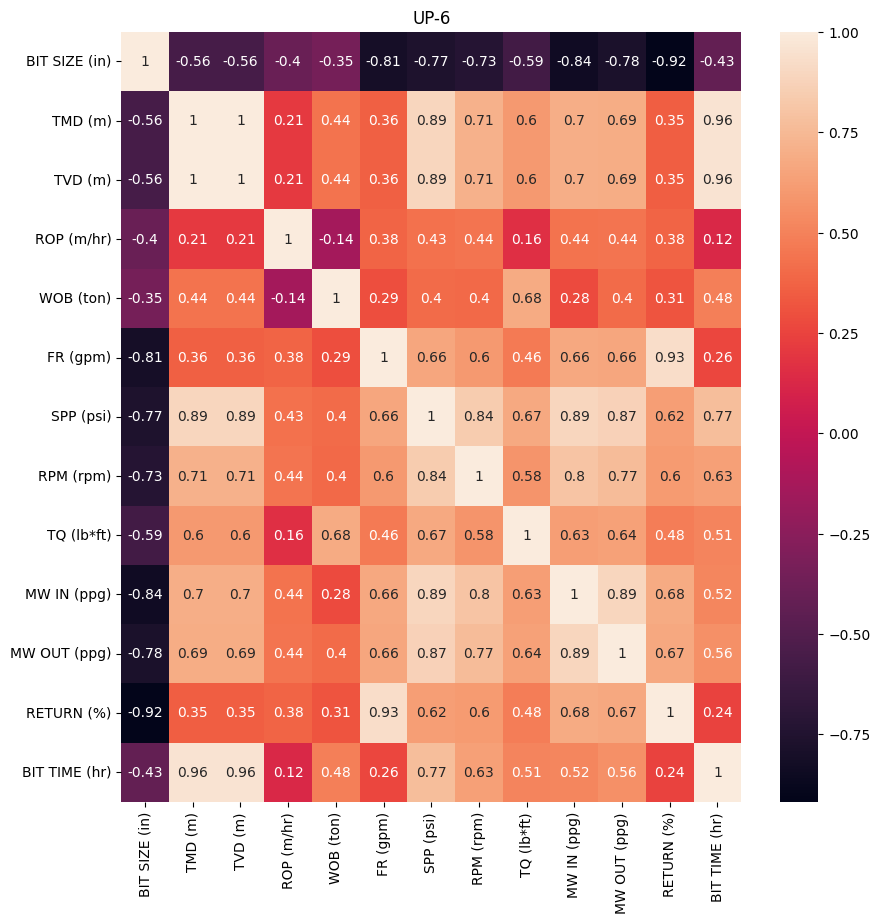

In [1864]:
plt.figure(figsize=(10,10))
sns.heatmap(data_up6.corr(method='pearson'), annot=True).set(title='UP-6')

# Preprocessing Dataset UP-6

In [1865]:
#read data

data_up6 = pd.read_csv('https://raw.githubusercontent.com/ikiearth/DATASET-UTS-AI-Universitas-Pertamina/main/UP-6.csv')
data_up6.head()

FORMATION  BIT SIZE (in)  TMD (m)  TVD (m)  ROP (m/hr)  WOB (ton)  FR (gpm)  \
0       Mio           24.0       18    18.02        25.6          2     152.4   
1       Mio           24.0       19    19.00        35.5          2     152.2   
2       Mio           24.0       20    19.50        20.6          2     114.3   
3       Mio           24.0       21    19.50        20.1          2     152.3   
4       Mio           24.0       22    19.50        19.9          2     152.3   

   SPP (psi)  RPM (rpm)  TQ (lb*ft)  MW IN (ppg)  MW OUT (ppg)  RETURN (%)  \
0         10         62        1363          8.7           8.7           0   
1         10         57         649          8.7           8.7           0   
2          8         43           0          8.7           8.7           0   
3         10         58           0          8.7           8.7           0   
4         10         58           0          8.7           8.7           0   

   BIT TIME (hr)            DATE TIME  
0           0.04  28/07/2010 12.17.20  
1           0.11  28/07/2010 12.21.35  
2           0.17  28/07/2010 12.46.54  
3           0.17  28/07/2010 12.25.31  
4           0.17  28/07/2010 12.25.31

In [1866]:
data_up6.columns

Index(['FORMATION', 'BIT SIZE (in)', 'TMD (m)', 'TVD (m)', 'ROP (m/hr)',
       'WOB (ton)', 'FR (gpm)', 'SPP (psi)', 'RPM (rpm)', 'TQ (lb*ft)',
       'MW IN (ppg)', 'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)',
       'DATE TIME'],
      dtype='object')

In [1867]:
#drop feature yang tidak diperlukan

data_up6.drop(['FORMATION', 'BIT SIZE (in)', 'TMD (m)', 'FR (gpm)', 'SPP (psi)', 'TQ (lb*ft)', 'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)', 'DATE TIME'], axis=1, inplace=True)
data_up6.head()

TVD (m)  ROP (m/hr)  WOB (ton)  RPM (rpm)  MW IN (ppg)
0    18.02        25.6          2         62          8.7
1    19.00        35.5          2         57          8.7
2    19.50        20.6          2         43          8.7
3    19.50        20.1          2         58          8.7
4    19.50        19.9          2         58          8.7

[Text(0.5, 1.0, 'UP-6')]

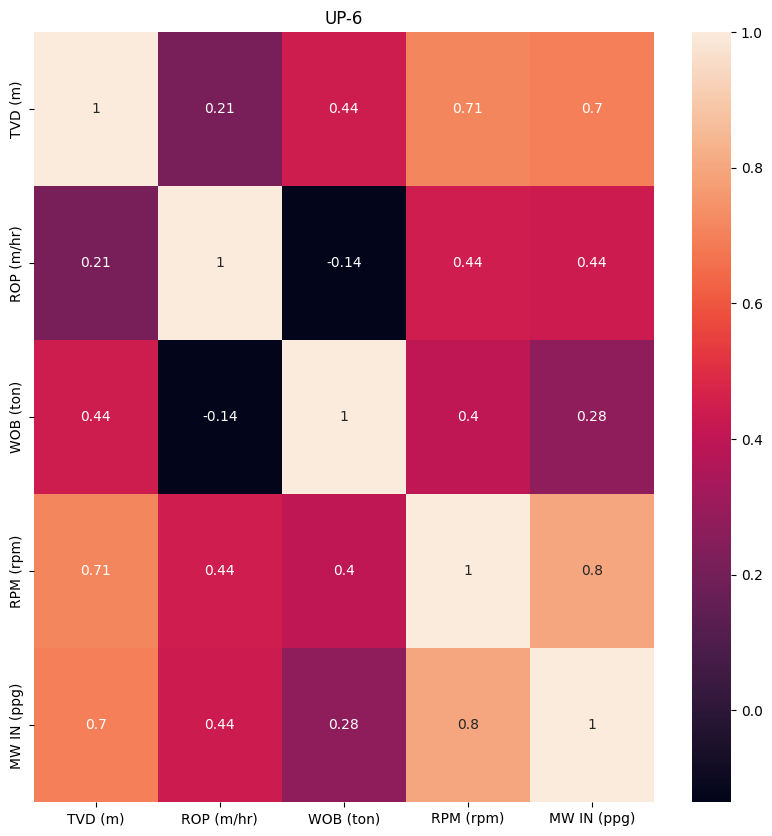

In [1868]:
plt.figure(figsize=(10,10))
sns.heatmap(data_up6.corr(method='pearson'), annot=True).set(title='UP-6')

In [1869]:
data_up6.describe()

TVD (m)   ROP (m/hr)    WOB (ton)    RPM (rpm)  MW IN (ppg)
count  2513.000000  2513.000000  2513.000000  2513.000000  2513.000000
mean   1273.917839    84.100398     9.636689   140.845603    10.543717
std     725.552343    42.813343     3.502575    33.564465     0.798868
min      18.020000     2.700000     0.000000    21.000000     8.420000
25%     646.000000    50.800000     7.000000   134.000000    10.577000
50%    1273.940000    77.400000    10.000000   150.000000    10.919000
75%    1901.870000   115.800000    12.000000   164.000000    10.977000
max    2529.770000   309.100000    21.000000   196.000000    11.208000

# Scaling and Normalization

In [1870]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()

In [1871]:
data_up6.head()

TVD (m)  ROP (m/hr)  WOB (ton)  RPM (rpm)  MW IN (ppg)
0    18.02        25.6          2         62          8.7
1    19.00        35.5          2         57          8.7
2    19.50        20.6          2         43          8.7
3    19.50        20.1          2         58          8.7
4    19.50        19.9          2         58          8.7

In [1872]:
minmax_scaler.fit(data_up6)
std_scaler.fit(data_up6)

data_minmax = minmax_scaler.transform(data_up6)
data_std = std_scaler.transform(data_up6)

In [1873]:
data_minmax= pd.DataFrame(data_minmax, columns= data_up6.columns)
data_minmax.describe()

TVD (m)   ROP (m/hr)    WOB (ton)    RPM (rpm)  MW IN (ppg)
count  2513.000000  2513.000000  2513.000000  2513.000000  2513.000000
mean      0.500009     0.265667     0.458890     0.684832     0.761735
std       0.288863     0.139730     0.166789     0.191797     0.286538
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.250017     0.156984     0.333333     0.645714     0.773673
50%       0.500018     0.243799     0.476190     0.737143     0.896341
75%       0.750015     0.369125     0.571429     0.817143     0.917145
max       1.000000     1.000000     1.000000     1.000000     1.000000

In [1874]:
data_minmax= pd.DataFrame(data_std, columns= data_up6.columns)
data_minmax.describe()

TVD (m)    ROP (m/hr)     WOB (ton)     RPM (rpm)   MW IN (ppg)
count  2.513000e+03  2.513000e+03  2.513000e+03  2.513000e+03  2.513000e+03
mean  -1.809580e-16  2.261974e-16 -2.261974e-16 -3.166764e-16 -5.881134e-16
std    1.000199e+00  1.000199e+00  1.000199e+00  1.000199e+00  1.000199e+00
min   -1.731299e+00 -1.901664e+00 -2.751863e+00 -3.571320e+00 -2.658939e+00
25%   -8.656065e-01 -7.779590e-01 -7.529357e-01 -2.039945e-01  4.167043e-02
50%    3.054938e-05 -1.565337e-01  1.037474e-01  2.727950e-01  4.698616e-01
75%    8.656538e-01  7.405614e-01  6.748695e-01  6.899858e-01  5.424788e-01
max    1.731236e+00  5.256408e+00  3.244919e+00  1.643565e+00  8.316956e-01

# Normalization

In [1875]:
data_up6_norm = data_up6

In [1876]:
from sklearn.preprocessing import normalize
data_normal_up6 = normalize(X= data_up6_norm, norm='l2', axis=1)

In [1877]:
data_normal_up6 = pd.DataFrame(data_normal_up6, columns= data_up6_norm.columns)
data_normal_up6.head()

TVD (m)  ROP (m/hr)  WOB (ton)  RPM (rpm)  MW IN (ppg)
0  0.257330    0.365574   0.028560   0.885374     0.124238
1  0.270056    0.504578   0.028427   0.810168     0.123657
2  0.372985    0.394025   0.038255   0.822479     0.166409
3  0.299895    0.309123   0.030758   0.891996     0.133799
4  0.300179    0.306337   0.030788   0.892841     0.133926

# Linear Regression

In [1878]:
X = data_normal_up6.drop(['ROP (m/hr)'], axis=1)
y = data_normal_up6['ROP (m/hr)']

In [1879]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [1880]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)


X_train_scaled = sc.transform(X_train)
X_train_scaled

array([[ 0.32465036, -0.58565181, -0.44779976, -0.43247766],
       [ 0.31837363, -0.74361561, -0.32554538, -0.30184247],
       [ 0.17458825, -0.44289836, -0.04395113, -0.25572592],
       ...,
       [ 0.22222694, -0.42185786, -0.14537037, -0.30281804],
       [-0.42758245,  2.32519399,  1.22182745,  0.84714765],
       [ 0.16054458, -0.3202341 , -0.22935455, -0.29322651]])

In [1881]:
X_train.columns

Index(['TVD (m)', 'WOB (ton)', 'RPM (rpm)', 'MW IN (ppg)'], dtype='object')

In [1882]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_train_scaled.describe()

TVD (m)     WOB (ton)     RPM (rpm)   MW IN (ppg)
count  2.010000e+03  2.010000e+03  2.010000e+03  2.010000e+03
mean  -3.216885e-16  9.721356e-18  2.828031e-17 -5.788626e-17
std    1.000249e+00  1.000249e+00  1.000249e+00  1.000249e+00
min   -8.446802e+00 -1.076101e+00 -8.257012e-01 -5.757804e-01
25%    1.353030e-01 -5.808326e-01 -6.480989e-01 -5.006809e-01
50%    2.848133e-01 -4.420811e-01 -3.445433e-01 -3.610014e-01
75%    3.829589e-01  2.401953e-01  1.989367e-01  1.414750e-02
max    4.139324e-01  7.046961e+00  5.337249e+00  7.556409e+00

In [1883]:
X_test_scaled = sc.transform(X_test)

In [1884]:
X.columns

Index(['TVD (m)', 'WOB (ton)', 'RPM (rpm)', 'MW IN (ppg)'], dtype='object')

In [1885]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)

In [1886]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_scaled

TVD (m)  WOB (ton)  RPM (rpm)  MW IN (ppg)
0    0.262225  -0.162919  -0.177671    -0.248272
1    0.344088  -0.816817  -0.541588    -0.408896
2    0.391165  -0.611699  -0.672288    -0.514750
3    0.390814  -0.416734  -0.664585    -0.488174
4    0.345540  -0.476374  -0.555467    -0.435259
..        ...        ...        ...          ...
498  0.342892  -0.432879  -0.484234    -0.448420
499 -0.234321   0.070928   0.919563     0.302209
500 -0.526692   0.746198   1.166099     0.964257
501  0.406643  -0.481717  -0.749793    -0.571867
502  0.404544  -0.549981  -0.735189    -0.566430

[503 rows x 4 columns]

In [1887]:
sc.mean_

array([0.96371342, 0.01160329, 0.16787917, 0.0157507 ])

In [1888]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

## Model elevation on training set

In [1889]:
y_pred_train = regressor.predict(X_train_scaled)

Text(0.5, 1.0, 'using training set')

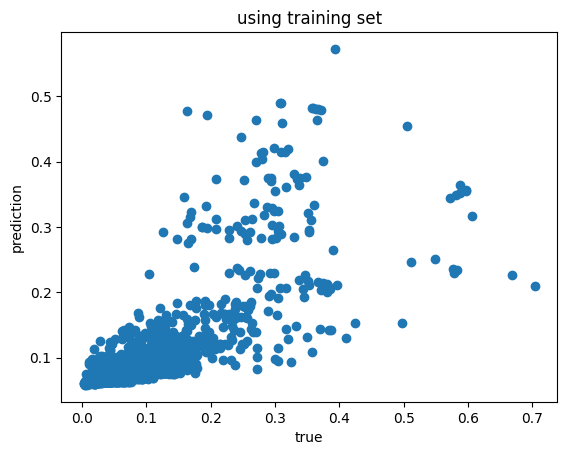

In [1890]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('true')
plt.ylabel('prediction')
plt.title('using training set')

In [1891]:
from sklearn.metrics import r2_score

r2_score(y_train, y_pred_train)

0.5690680926753913

In [1892]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_pred_train, squared=False)

0.05587908711216186

# Model elevation on testing set

In [1893]:
y_pred_test = regressor.predict(X_test_scaled)

In [1894]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_test)

0.5487235955461015

In [1895]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_test, squared=False)

0.04769953014391286

Text(0.5, 1.0, 'using testing set')

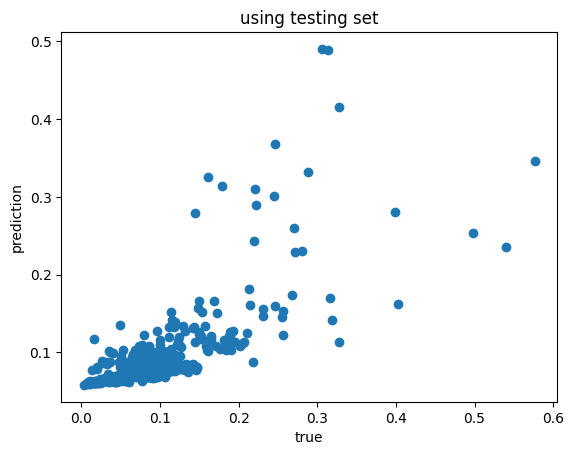

In [1896]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('true')
plt.ylabel('prediction')
plt.title('using testing set')

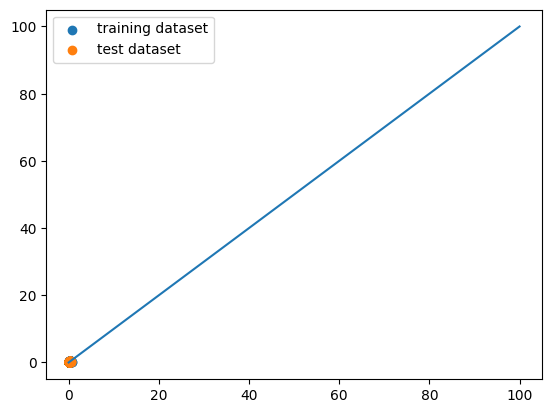

In [1897]:
plt.scatter(y_train, y_pred_train, label="training dataset")
plt.scatter(y_test, y_pred_test, label="test dataset")
plt.plot([0,100], [0,100])
plt.legend()

# Validation Curve and Learning Curve for Linear Regression

# Validation Curve

In [1898]:
param_range = np.logspace(-7,5,13)
param_range

array([1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])

In [1899]:
train_scores, test_scores = validation_curve(estimator=Ridge(),
                                             X=X_train_scaled,
                                             y=y_train,
                                             param_name='alpha',
                                             param_range=param_range,
                                             cv=10)

In [1900]:
pd.DataFrame(train_scores)

0         1         2         3         4         5         6  \
0   0.552414  0.575158  0.573474  0.563179  0.578623  0.574008  0.570655   
1   0.552414  0.575158  0.573474  0.563179  0.578623  0.574008  0.570655   
2   0.552414  0.575158  0.573474  0.563179  0.578623  0.574008  0.570655   
3   0.552414  0.575158  0.573474  0.563179  0.578623  0.574008  0.570655   
4   0.552414  0.575158  0.573474  0.563179  0.578623  0.574008  0.570655   
5   0.552414  0.575158  0.573474  0.563179  0.578623  0.574008  0.570655   
6   0.552414  0.575158  0.573474  0.563179  0.578623  0.574008  0.570655   
7   0.552413  0.575156  0.573473  0.563178  0.578621  0.574007  0.570654   
8   0.552325  0.575023  0.573362  0.563074  0.578456  0.573906  0.570538   
9   0.549077  0.569987  0.569089  0.559210  0.572417  0.569950  0.566212   
10  0.519229  0.535697  0.535156  0.528440  0.535634  0.533955  0.533352   
11  0.298896  0.319352  0.311738  0.309763  0.317168  0.300867  0.311714   
12  0.051930  0.057428  0.055003  0.054644  0.056669  0.051721  0.054958   

           7         8         9  
0   0.564514  0.564225  0.579478  
1   0.564514  0.564225  0.579478  
2   0.564514  0.564225  0.579478  
3   0.564514  0.564225  0.579478  
4   0.564514  0.564225  0.579478  
5   0.564514  0.564225  0.579478  
6   0.564514  0.564225  0.579478  
7   0.564513  0.564224  0.579476  
8   0.564407  0.564117  0.579313  
9   0.560504  0.559995  0.573460  
10  0.528988  0.529865  0.537215  
11  0.307216  0.320360  0.318085  
12  0.053835  0.058123  0.056873

In [1901]:
pd.DataFrame(test_scores)

0         1         2         3         4         5         6  \
0   0.682368  0.502299  0.524083  0.616811  0.457676  0.508236  0.554229   
1   0.682368  0.502299  0.524083  0.616811  0.457676  0.508236  0.554229   
2   0.682368  0.502299  0.524083  0.616811  0.457676  0.508236  0.554229   
3   0.682368  0.502299  0.524083  0.616811  0.457676  0.508236  0.554229   
4   0.682367  0.502300  0.524083  0.616810  0.457677  0.508236  0.554229   
5   0.682363  0.502303  0.524083  0.616808  0.457685  0.508236  0.554229   
6   0.682326  0.502330  0.524083  0.616788  0.457765  0.508237  0.554227   
7   0.681958  0.502604  0.524087  0.616580  0.458553  0.508246  0.554208   
8   0.678468  0.505031  0.524080  0.614551  0.465646  0.508369  0.553927   
9   0.656214  0.514130  0.523167  0.599216  0.497802  0.512220  0.548993   
10  0.602068  0.484452  0.517869  0.548753  0.494118  0.548536  0.522171   
11  0.342792  0.269815  0.323615  0.318214  0.287974  0.365238  0.316067   
12  0.055304  0.046574  0.058089  0.053898  0.048511  0.062652  0.056383   

           7         8         9  
0   0.602773  0.596239  0.454723  
1   0.602773  0.596239  0.454723  
2   0.602773  0.596239  0.454723  
3   0.602773  0.596239  0.454723  
4   0.602773  0.596239  0.454724  
5   0.602772  0.596237  0.454731  
6   0.602754  0.596219  0.454801  
7   0.602576  0.596041  0.455492  
8   0.600824  0.594273  0.461647  
9   0.587568  0.578714  0.487914  
10  0.552457  0.494996  0.480316  
11  0.328558  0.240413  0.279290  
12  0.047003  0.037979  0.047259

In [1902]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

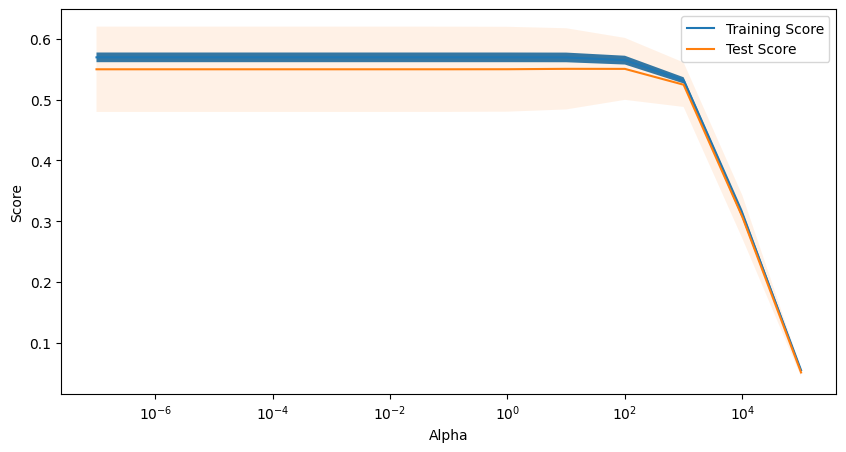

In [1903]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))
axes.semilogx(param_range, train_scores_mean, label='Training Score')
axes.semilogx(param_range, test_scores_mean, label='Test Score')

axes.fill_between(param_range,
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std)

axes.fill_between(param_range,
                  test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std,
                  alpha=0.1)

axes.set_xlabel('Alpha')
axes.set_ylabel('Score')
axes.legend()

# Learning Curve

In [1904]:
train_sizes=np.linspace(0.05,1,9)

In [1905]:
train_sizes_abs, train_scores, test_scores = learning_curve(Ridge(), 
                                                            X_train_scaled, 
                                                            y_train, 
                                                            train_sizes=np.linspace(0.05,1,9),
                                                            cv=10)

In [1906]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

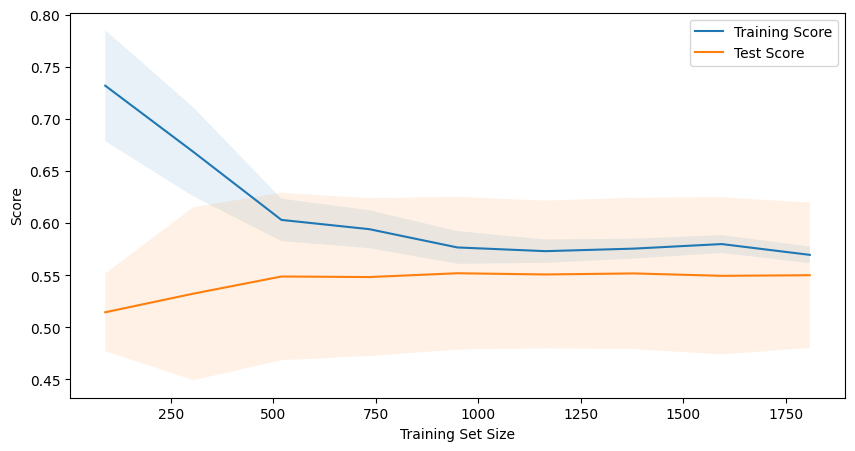

In [1907]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))
axes.plot(train_sizes_abs, train_scores_mean, label='Training Score')
axes.plot(train_sizes_abs, test_scores_mean, label='Test Score')

axes.fill_between(train_sizes_abs,
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  alpha=0.1)

axes.fill_between(train_sizes_abs,
                  test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std,
                  alpha=0.1)

axes.set_xlabel('Training Set Size')
axes.set_ylabel('Score')
axes.legend()

# Hyperparameter tuning for Linear Regression

In [1908]:
from sklearn.model_selection import GridSearchCV

In [1909]:
# define searching domain (with grid search)
param_grid = {'solver':['auto', 'svd', 'cholesky'],
              'alpha': np.logspace(-7,5,5)}

# create search command
search = GridSearchCV(estimator=Ridge(),
                      param_grid=param_grid,
                      scoring='r2',
                      cv=5)

In [1910]:
# command search step by training
search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.e-07, 1.e-04, 1.e-01, 1.e+02, 1.e+05]),
                         'solver': ['auto', 'svd', 'cholesky']},
             scoring='r2')

In [1911]:
search.best_params_

{'alpha': 0.1, 'solver': 'svd'}

In [1912]:
model_optimized6 = search.best_estimator_

In [1913]:
model_optimized6.fit(X_train_scaled, y_train)

Ridge(alpha=0.1, solver='svd')

In [1914]:
y_pred_test = model_optimized6.predict(X_test_scaled)

In [1915]:
y_pred_train = model_optimized6.predict(X_train_scaled)

Text(0.5, 1.0, 'using testing set')

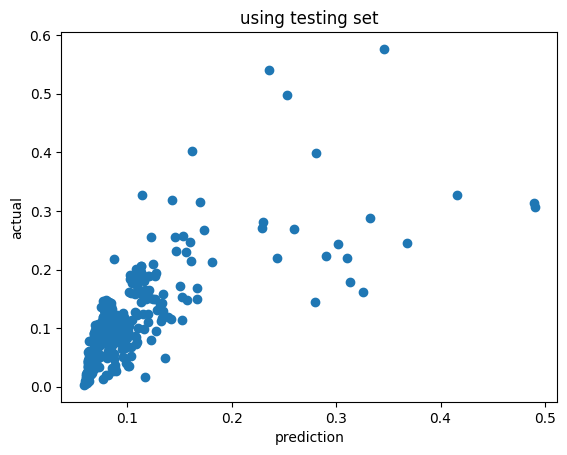

In [1916]:
plt.scatter(y_pred_test, y_test)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('using testing set')

In [1917]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.548700563741753

Text(0.5, 1.0, 'using training set')

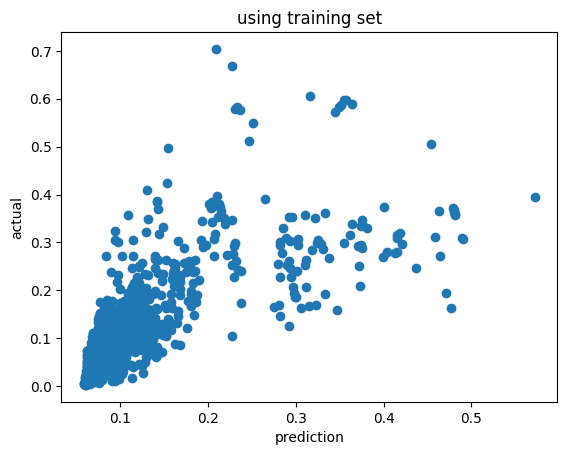

In [1918]:
plt.scatter(y_pred_train, y_train)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('using training set')

In [1919]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.5690680814577719

# Permutation Feature Importance for Linear Regression

In [1920]:
r = permutation_importance(model_optimized6,
                           X_train_scaled,
                           y_train,
                           n_repeats=10)

In [1921]:
for i in r.importances_mean.argsort()[::-1]:
  if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    print(f'{X_train.columns[i]:<8}\t'
          f'{r.importances_mean[i]:.3f}'
          f' +/- {r.importances_std[i]:.3f}')

MW IN (ppg)	0.968 +/- 0.025
RPM (rpm)	0.050 +/- 0.006
WOB (ton)	0.041 +/- 0.004


In [1922]:
tree_feature_importances = r.importances_mean
tree_feature_importances

array([1.96232794e-04, 4.08343197e-02, 4.97891692e-02, 9.68478568e-01])

In [1923]:
sorted_idx = tree_feature_importances.argsort()
sorted_idx

array([0, 1, 2, 3])

[Text(0, 0, 'TVD (m)'),
 Text(0, 1, 'WOB (ton)'),
 Text(0, 2, 'RPM (rpm)'),
 Text(0, 3, 'MW IN (ppg)')]

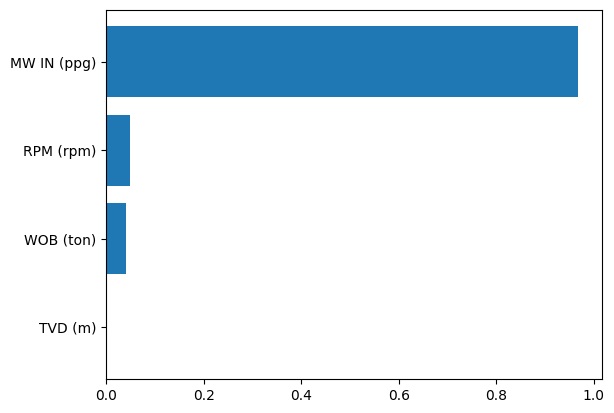

In [1924]:
fig, ax = plt.subplots()
y_ticks = np.arange(0, len(X_train.columns))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(X.columns[sorted_idx])

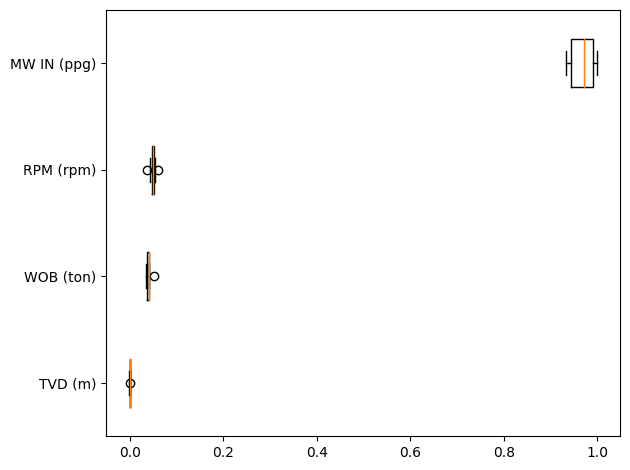

In [1925]:
fig, ax = plt.subplots()
ax.boxplot(r.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
fig.tight_layout()
plt.show()

In [1926]:
r.importances_mean

array([1.96232794e-04, 4.08343197e-02, 4.97891692e-02, 9.68478568e-01])

In [1927]:
r.importances_std

array([0.00040264, 0.00439854, 0.0062782 , 0.02503951])

# Result Interpretation

In [1928]:
regressor.intercept_

0.09751211216225893

In [1929]:
regressor.coef_

array([ 0.00093938, -0.01230107,  0.01324406,  0.05927059])

## Prediction using The Model

In [1995]:
input_TVD = 428.1
input_WOB = 3
input_RPM = 70
input_MW_IN = 10.4

In [1996]:
input = np.array([input_TVD, 
                  input_WOB, 
                  input_RPM, 
                  input_MW_IN]).reshape(1, -1)
input

array([[428.1,   3. ,  70. ,  10.4]])

In [1998]:
output = regressor.predict(sc.transform(input))
output

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([39.16926646])

# Cross-Validation

In [1933]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator= regressor, X= X_train_scaled, y= y_train, cv= 10)
scores

array([0.68236757, 0.50229944, 0.52408285, 0.61681066, 0.45767605,
       0.50823602, 0.55422899, 0.60277348, 0.59623873, 0.45472329])

In [1934]:
np.mean(scores)

0.5499437081946096

In [1935]:
np.std(scores)

0.07015581630890617

# Random Forest Regressor

In [1936]:
#data_up5.drop(['Formation', 'TVD (m)', 'FR (gpm)', 'SPP (psi)',  'TQ (lb.ft)', 'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)', 'DATE TIME'], axis=1, inplace=True)
data_up6.head()

TVD (m)  ROP (m/hr)  WOB (ton)  RPM (rpm)  MW IN (ppg)
0    18.02        25.6          2         62          8.7
1    19.00        35.5          2         57          8.7
2    19.50        20.6          2         43          8.7
3    19.50        20.1          2         58          8.7
4    19.50        19.9          2         58          8.7

In [1937]:
X = data_up6.drop(['ROP (m/hr)'], axis=1)
y = data_up6['ROP (m/hr)']

In [1938]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [1939]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))

0.9705229652860207
0.9953729757321618


## Model Evaluation dan Inspection

In [1940]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Validation Curve and Learning Curve for Random Forest Regressor

## Validation Curve

In [1941]:
param_range=np.arange(1,6)
param_name='max_depth'
train_scores, valid_scores = validation_curve(RandomForestRegressor(), X_train,
                                              y_train, param_name=param_name,
                                              param_range=param_range, cv=10)

In [1942]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

Text(0, 0.5, 'Score')

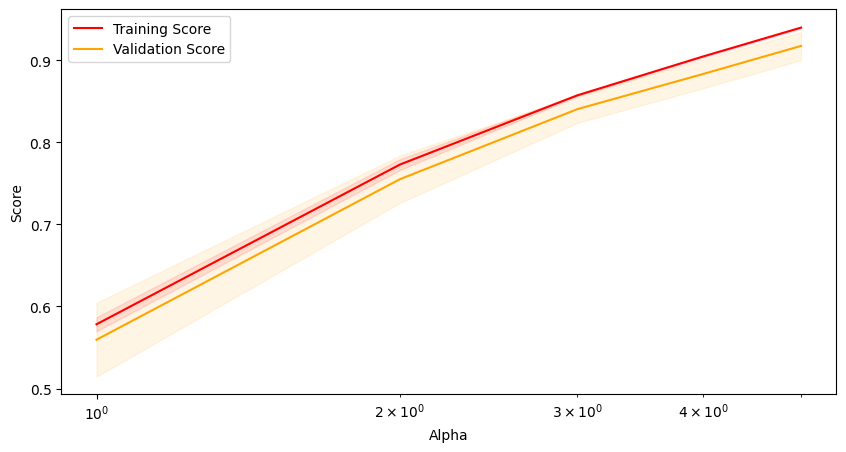

In [1943]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.semilogx(param_range, train_scores_mean, label='Training Score', color='red')
axes.semilogx(param_range, valid_scores_mean, label='Validation Score', color='orange')
axes.fill_between(param_range, 
                  valid_scores_mean - valid_scores_std,
                  valid_scores_mean + valid_scores_std,
                  color='orange',
                  alpha=0.1)
axes.fill_between(param_range, 
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  color='red',
                  alpha=0.1)
axes.legend()
axes.set_xlabel('Alpha')
axes.set_ylabel('Score')

## Learning Curve

In [1944]:
train_sizes = np.linspace(0.05, 1, 9)

In [1945]:
train_sizes = np.linspace(0.05,1,12)
train_sizes, train_scores, valid_scores, fit_times, _ = learning_curve(RandomForestRegressor(), X_train,
                                                                  y_train, train_sizes=train_sizes, cv=10,
                                                                  return_times=True)

In [1946]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

Text(0, 0.5, 'Score')

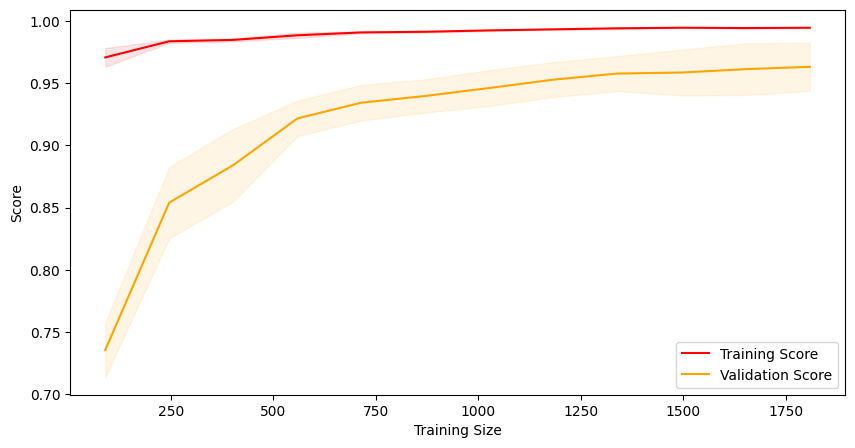

In [1947]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.plot(train_sizes, train_scores_mean, label='Training Score', color='red')
axes.plot(train_sizes, valid_scores_mean, label='Validation Score', color='orange')
axes.fill_between(train_sizes, 
                  valid_scores_mean - valid_scores_std,
                  valid_scores_mean + valid_scores_std,
                  color='orange',
                  alpha=0.1)
axes.fill_between(train_sizes, 
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  color='red',
                  alpha=0.1)
axes.legend()
axes.set_xlabel('Training Size')
axes.set_ylabel('Score')

# Hyperparameter Tuning for Random Forest Regressor

In [1948]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_distributions = {'n_estimators': sp_randint(50, 200),
                       'max_features': sp_randint(0, 10),
                       'max_depth': sp_randint(3, 20),}
print(param_distributions)
random_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions, scoring='r2', cv=10)

random_search.fit(X_train, y_train)

{'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x35d540790>, 'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x35d60a590>, 'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x35d608700>}


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x35d608700>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x35d60a590>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x35d540790>},
                   scoring='r2')

In [1949]:
random_search.best_params_

{'max_depth': 15, 'max_features': 9, 'n_estimators': 102}

In [1950]:
model = random_search.best_estimator_

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evauation on Testing Set

Text(0.5, 1.0, 'using testing set')

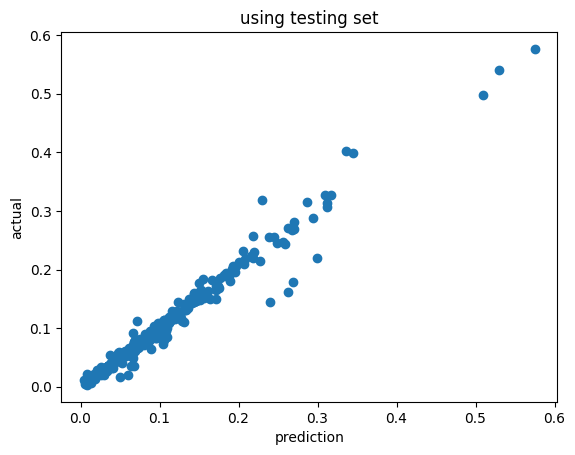

In [1951]:
plt.scatter(y_pred_test, y_test)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('using testing set')

In [1952]:
# see blind set score
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_test)

0.9699749419799465

# Evauation on Training Set

In [1953]:
y_pred_train = model.predict(X_train)

Text(0.5, 1.0, 'using training set')

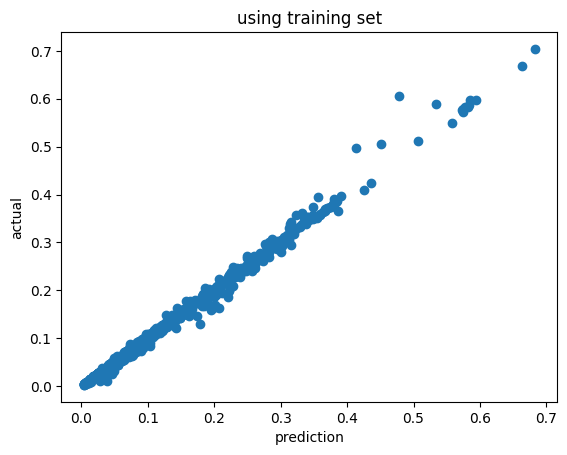

In [1954]:
plt.scatter(y_pred_train, y_train)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('using training set')

In [1955]:
# see blind set score
from sklearn.metrics import r2_score

r2_score(y_train, y_pred_train)

0.9948575764036117

# Permutation Feature Importance for Random Forest Regressor

In [1956]:
from sklearn.inspection import permutation_importance

r = permutation_importance(model, 
                           X_test, 
                           y_test,
                           n_repeats=30)

In [1957]:
for i in r.importances_mean.argsort()[::-1]:
  if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    print(f'{X_train.columns[i]:<8}\t'
          f'{r.importances_mean[i]:.3f}'
          f' +/- {r.importances_std[i]:.3f}')

TVD (m) 	4.294 +/- 0.146
RPM (rpm)	0.977 +/- 0.043
WOB (ton)	0.057 +/- 0.007
MW IN (ppg)	0.023 +/- 0.002


In [1958]:
tree_feature_importances = r.importances_mean
tree_feature_importances

array([4.2936502 , 0.05685016, 0.97699486, 0.02252028])

In [1959]:
sorted_idx = tree_feature_importances.argsort()
sorted_idx

array([3, 1, 2, 0])

[Text(0, 0, 'MW IN (ppg)'),
 Text(0, 1, 'WOB (ton)'),
 Text(0, 2, 'RPM (rpm)'),
 Text(0, 3, 'TVD (m)')]

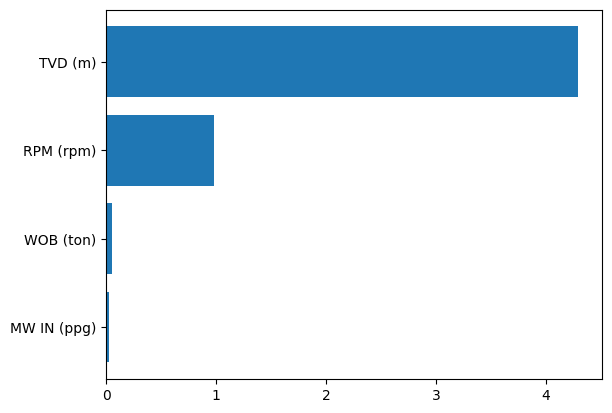

In [1960]:
fig, ax = plt.subplots()
y_ticks = np.arange(0, len(X_train.columns))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(X.columns[sorted_idx])

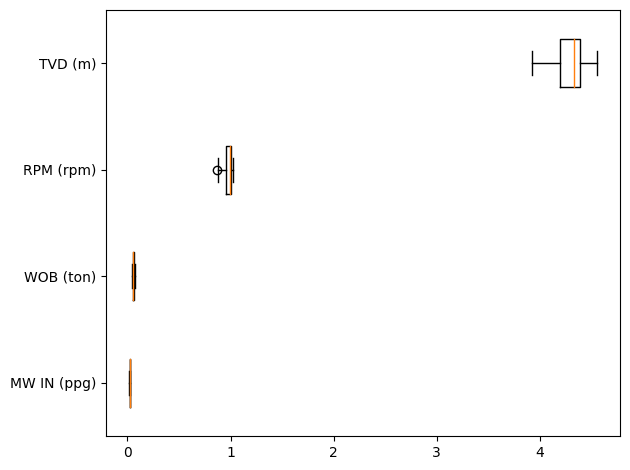

In [1961]:
fig, ax = plt.subplots()
ax.boxplot(r.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
fig.tight_layout()
plt.show()

## Prediction Using the Model

In [2006]:
input_TVD = 428.1
input_WOB = 3
input_RPM = 70
input_MW_IN = 10.4

In [2007]:
input = np.array([input_TVD, 
                  input_WOB, 
                  input_RPM, 
                  input_MW_IN]).reshape(1, -1)
input

array([[428.1,   3. ,  70. ,  10.4]])

In [2009]:
output = model5.predict(input)
output

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([34.30352941])